# Minimal Left Right Symmetric models with Higgs doublets

In this notebook we work the potential of MLRSM with Higgs doublets 

In [259]:
from sympy import symbols, init_printing, Matrix, I, sqrt, conjugate, trace, factor, simplify
from sympy.physics import msigma 
init_printing()

## Scalars

### Bidoublet

In [260]:
phi1p = symbols(r'{{\phi_1^+}}')
phi2p = symbols(r'{{\phi_2^+}}')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0')

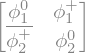

In [261]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [conjugate(phi2p), phi20]
    ]
)
Phi

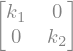

In [262]:
k1, k2 = symbols(r"k_1, k_2", positive=True)
sqrt2 = sqrt(2)
vevPhi = {phi10:k1, phi20:k2, phi1p:0, phi2p:0}
Phi.subs(vevPhi)

### Doublets

In [263]:
chiL0 = symbols(r'\chi_L^0')
chiR0 = symbols(r'\chi_R^0')

chiLp = symbols(r'{{\chi_L^+}}')
chiRp = symbols(r'{{\chi_R^+}}')

In [264]:
ChiL = Matrix(
    [
        [chiLp],
        [chiL0]
    ]
)

ChiR = Matrix(
    [
        [chiRp],
        [chiR0]
    ]
)

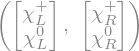

In [265]:
ChiL, ChiR

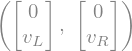

In [266]:
vL, vR = symbols(r'v_L, v_R', positive=True)
vevL = {chiL0:vL, chiLp:0}
vevR = {chiR0:vR, chiRp:0}
ChiL.subs(vevL), ChiR.subs(vevR)

## Scalar potential

In [267]:
from sympy.physics.quantum import Dagger
from sympy import solve

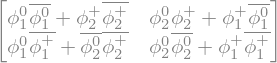

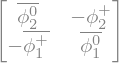

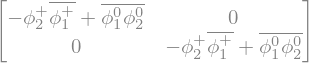

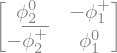

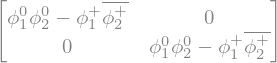

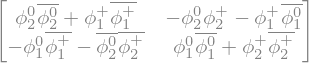

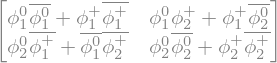

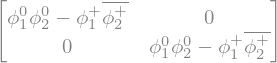

In [268]:
PhiDagger = Dagger(Phi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = (msigma(2)*conjugate(Phi)*msigma(2))
#Phitilde
display(Phitilde)
PhitildeDagger = Dagger(Phitilde)
PhiDaggerPhitilde = PhiDagger*Phitilde
display(PhiDaggerPhitilde)
#PhitildeDagger
display(PhitildeDagger)
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhitildeDaggerPhitilde = PhitildeDagger*Phitilde
display(PhitildeDaggerPhitilde)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)
PhiPhitildeDagger = Phi*PhitildeDagger
display(PhiPhitildeDagger)

In [269]:
ChiLDagger = Dagger(ChiL)
ChiRDagger = Dagger(ChiR)

ChiLDaggerChiL = (ChiLDagger*ChiL)[0]
display(ChiLDaggerChiL)
ChiRDaggerChiR = (ChiRDagger*ChiR)[0]
display(ChiRDaggerChiR)

In [270]:
mu12, mu22 = symbols(r'\mu_1^2, \mu_2^2', real=True)
lamb1, lamb2, lamb3, lamb4, lamb5, lamb6 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4, \lambda_5, \lambda_6', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
rho1, rho2,= symbols(r'\rho_1, \rho_2', real=True)


In [271]:
#conjugate(trace(PhiDaggerPhitilde*PhiDaggerPhitilde))

In [272]:
#trace(PhitildeDaggerPhi*PhitildeDaggerPhi)

In [273]:
V = (
    - mu12*trace(PhiDaggerPhi)
    + lamb1*trace(PhiDaggerPhi)**2
    + lamb2*trace(PhiDaggerPhi*PhiDaggerPhi)
    + lamb3/2*(trace(PhiDaggerPhitilde) + trace(PhitildeDaggerPhi))**2
    + lamb4/2*(trace(PhiDaggerPhitilde) - trace(PhitildeDaggerPhi))**2
    + lamb5*trace(PhiDaggerPhi*PhitildeDaggerPhitilde)
    + lamb6/2*(trace(PhiDaggerPhitilde*PhiDaggerPhitilde) + conjugate(trace(PhiDaggerPhitilde*PhiDaggerPhitilde)))
    - mu22*(ChiLDaggerChiL + ChiRDaggerChiR)
    + rho1*(ChiLDaggerChiL**2 + ChiRDaggerChiR**2)
    + rho2*(ChiLDaggerChiL*ChiRDaggerChiR)
    + alpha1*trace(PhiDaggerPhi)*(ChiLDaggerChiL + ChiRDaggerChiR)
    + alpha2*(
        ChiLDagger*Phi*PhiDagger*ChiL
        + ChiRDagger*PhiDagger*Phi*ChiR
    )[0]
    + alpha3*(
        ChiLDagger*Phitilde*PhitildeDagger*ChiL
        + ChiRDagger*PhitildeDagger*Phitilde*ChiR
    )[0]
)

In [274]:
vevR

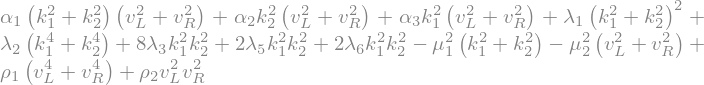

In [275]:
VLRPhi_vev = V.subs(vevL).subs(vevR).subs(vevPhi).simplify()#.collect([mu12, mu22, mu32, lamb2, rho1, beta2], factor)#.subs(k1ri)
VLRPhi_vev

### Tadpole conditions

In [276]:
scalar_vevs = [k1, k2, vL, vR]
tadpoles_relations = {}
for vev in scalar_vevs:
    tadpoles_relations[vev] = VLRPhi_vev.diff(vev).factor()

In [277]:
for muij, tadpole in tadpoles_relations.items():
    display(muij)
    tadpole_simplified = tadpole.collect([k1, k2, vL, vR], factor)
    display(tadpole_simplified)

In [278]:
tadpoles_relations[k1]

In [279]:
tadpoles_relations[vR].subs(k2,0).subs(vL, 0)

In [280]:
tadpole12_sol = solve([tadpoles_relations[k1], tadpoles_relations[vR]], [mu12, mu22], dict=True)[0]
tadpole12_sol

In [281]:
tadpoles_relations_simplified = {}
for muij, tadpole in tadpole12_sol.items():
    display(muij)
    tadpole_simplified = tadpole.collect([k1, k2, vL, vR], factor).subs(k2,0).subs(vL, 0) # remove vL and vR
    display(tadpole_simplified)
    tadpoles_relations_simplified[muij] = tadpole_simplified

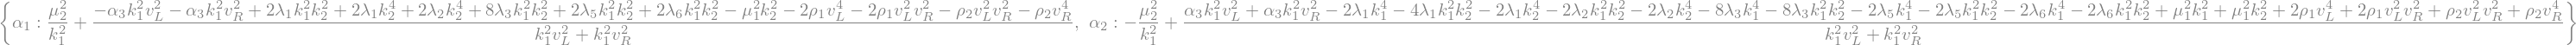

In [282]:
tadpole12_sol_2L = solve([tadpoles_relations[k2], tadpoles_relations[vL]], [alpha1, alpha2, mu22], dict=True)[0]
tadpole12_sol_2L

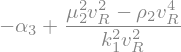

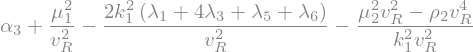

In [283]:
tadpoles_relations_simplified_2L = {}
for muij, tadpole in tadpole12_sol_2L.items():
    display(muij)
    tadpole_simplified = tadpole.expand().collect([k1, k2, vL, vR], factor).subs(k2,0).subs(vL, 0)
    display(tadpole_simplified)
    tadpoles_relations_simplified_2L[muij] = tadpole_simplified

## Mass matrices

In [284]:
phi10r, phi10i = symbols(r'\phi_1^{0r}, \phi_1^{0i}', real=True)
phi20r, phi20i = symbols(r'\phi_2^{0r}, \phi_2^{0i}', real=True)
chiR0r, chiR0i = symbols(r'\chi_R^{0r}, \chi_R^{0i}', real=True)
chiL0r, chiL0i = symbols(r'\chi_L^{0r}, \chi_L^{0i}', real=True)
complex_scalar_fields = {
    phi10: (k1 + phi10r + I*phi10i),
    phi20: (k2 + phi20r + I*phi20i),
    chiR0: (vR + chiR0r + I*chiR0i),
    chiL0: (vL + chiL0r + I*chiL0i)
}

In [285]:
VLRPhi_ri = V.subs(complex_scalar_fields)

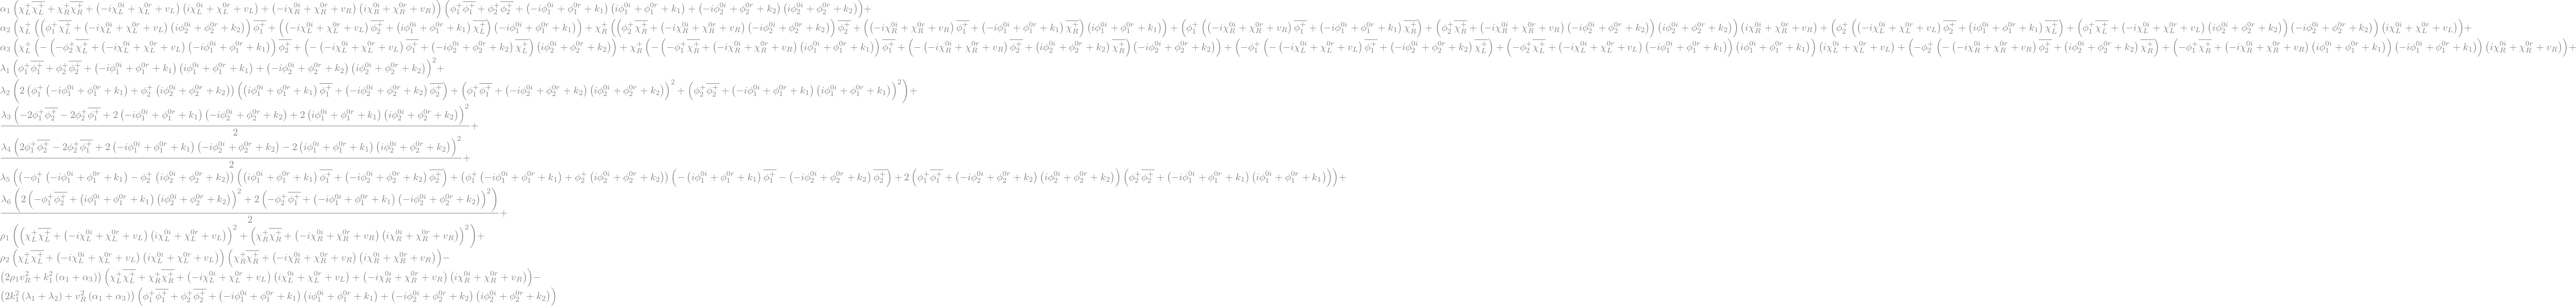

In [286]:
VLRPhi_ri_tadpole_caso1 = VLRPhi_ri.subs(tadpoles_relations_simplified)
VLRPhi_ri_tadpole_caso1

In [287]:
vevPhi[phi10r] = 0#vevPhi[phi10]
vevPhi[phi10i] = 0
vevPhi[phi20r] = 0#vevPhi[phi20]
vevPhi[phi20i] = 0

In [288]:
vevL[chiL0r] = 0#vevL[deltaL0]
vevL[chiL0i] = 0
vevR[chiR0r] = 0#vevR[deltaR0]
vevR[chiR0i] = 0

In [289]:
from sympy import derive_by_array

In [290]:
def build_mass_matrix(potential, fields1, fields2):
    """
    Build the mass matrix for a given potential and fields.
    """
    # Initialize the mass matrix
    Matrix_elements = derive_by_array(derive_by_array(potential, fields1), fields2)

    return Matrix_elements.tomatrix()

### Charged scalar mass matrix

In [291]:
from sympy import Dummy

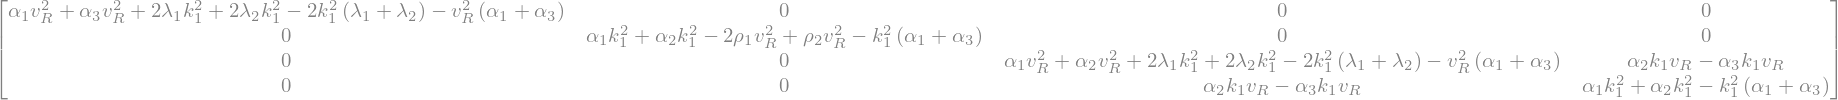

In [292]:
phip_fields = [phi2p, chiLp, phi1p, chiRp]

dummyconjugate1p = Dummy(r'\phi_1^{+,d}')
dummyconjugate2p = Dummy(r'\phi_2^{+,d}')
dummyconjugateRp = Dummy(r'\chi_R^{+,d}')
dummyconjugateLp = Dummy(r'\chi_L^{+,d}')

dummychangep = {
    conjugate(phi1p):dummyconjugate1p,
    conjugate(phi2p):dummyconjugate2p,
    conjugate(chiRp):dummyconjugateRp,
    conjugate(chiLp):dummyconjugateLp
}
phim_fields = [dummyconjugate2p, dummyconjugateLp, dummyconjugate1p, dummyconjugateRp] 
Mp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1.subs(dummychangep), phim_fields), phip_fields)).subs(
    {value:key for key, value in dummychangep.items()}
).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2,0).subs(vL, 0)
Mp_square

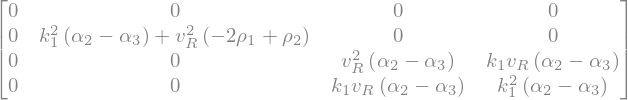

In [293]:
Mp_square = Mp_square.applyfunc(lambda x:x.collect([k1, vR], factor)).tomatrix()
Mp_square

In [294]:
from sympy import eye

In [295]:
z = symbols('z')
poly_p = (Mp_square - z*eye(4)).det()
eigenvals_p = solve(poly_p.expand().factor(), z, dict=True)

In [296]:
eigenvals_p

In [297]:
x1, x2, x3, x4 = symbols('x_1, x_2, x_3, x_4')
x = Matrix(
    [
        [x1],
        [x2],
        [x3],
        [x4]
    ]
)

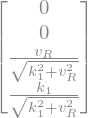

In [298]:
eigevector_sol3 = solve((Mp_square - eigenvals_p[1][z]*eye(4)).applyfunc(factor)*x, [x1, x2, x3, x4], dict=True)[0]
#eigevector_sol1
eigevector3 = x.subs(eigevector_sol3).subs(x4,1)
eigevector3 = (eigevector3/eigevector3.norm()).applyfunc(factor)
eigevector3

In [299]:
eigevector_sol2 = solve((Mp_square - eigenvals_p[2][z]*eye(4)).applyfunc(factor)*x, [x1, x2, x3, x4], dict=True)[0]
eigevector_sol2


In [300]:
eigevector2 = x.subs(eigevector_sol2).subs(x2,1)
eigevector2 = (eigevector2/eigevector2.norm()).applyfunc(factor)
eigevector2

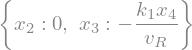

In [301]:
eigevector_sol4 = solve((Mp_square - eigenvals_p[0][z]*eye(4)).applyfunc(factor)*x, [x1, x2, x3, x4], dict=True)[0]
eigevector_sol4

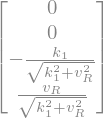

In [302]:
eigevector4 = x.subs(eigevector_sol4).subs(x4,1).subs(x1,0)
eigevector4 = (eigevector4/eigevector4.norm()).applyfunc(factor)
eigevector4

In [303]:
eigevector_sol1 = solve([x.dot(eigevector2), x.dot(eigevector3), x.dot(eigevector4)], [x1, x2, x3, x4] , dict=True)[0]
eigevector_sol1

In [304]:
eigevector1 = x.subs(eigevector_sol1).subs(x1,1)
eigevector1 = (eigevector1/eigevector1.norm()).applyfunc(factor)
eigevector1

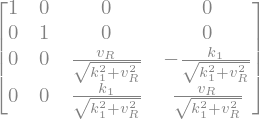

In [305]:
Pp = Matrix.hstack(eigevector1, eigevector2, eigevector3, eigevector4)
Pp

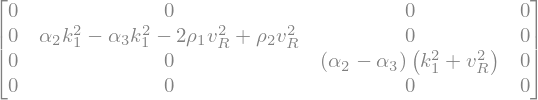

In [306]:
Dp = (Pp.T*Mp_square*Pp).applyfunc(factor)
Dp

In [307]:
Ppinv = Pp.T

In [308]:
Ppinv = Ppinv.applyfunc(lambda x:x.collect([k1, vR], factor))

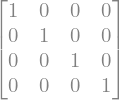

In [309]:
(Pp*Ppinv).applyfunc(factor)

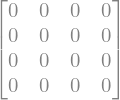

In [310]:
((Pp*Dp*Ppinv).applyfunc(factor) - Mp_square).applyfunc(factor)

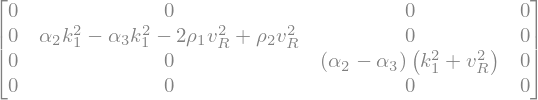

In [311]:
(Ppinv*Mp_square*Pp).applyfunc(factor)

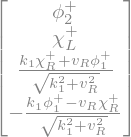

In [312]:
physical_charged_scalars_plus = (Ppinv*Matrix(phip_fields)).applyfunc(factor)
physical_charged_scalars_plus

In [313]:
epsilon = symbols('epsilon')

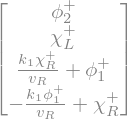

In [314]:
physical_charged_scalars_plus_approx = physical_charged_scalars_plus.applyfunc(
    lambda x:x.subs(k1, epsilon*vR).series(x=epsilon, x0=0, n=2).removeO().subs(epsilon, k1/vR)
)
physical_charged_scalars_plus_approx

In [315]:
phi1m, phi2m, chiLm, chiRm = symbols(r'\phi_1^-, \phi_2^-, \chi_L^-, \chi_R^-')

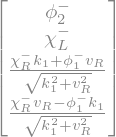

In [316]:
physical_charged_scalars_minus = (Ppinv*Matrix(phip_fields).subs(
    {
        phi1p: phi1m,
        phi2p: phi2m,
        chiLp: chiLm,
        chiRp: chiRm,
    }
)).applyfunc(factor)
physical_charged_scalars_minus

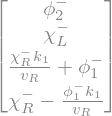

In [317]:
physical_charged_scalars_minus_approx = physical_charged_scalars_minus.applyfunc(
    lambda x:x.subs(k1, epsilon*vR).series(x=epsilon, x0=0, n=2).removeO().subs(epsilon, k1/vR)
)
physical_charged_scalars_minus_approx

Pp

In [318]:
from sympy import Eq

In [319]:
GRp = symbols(r'{{G_R^+}}')
HRp = symbols(r'{{H_R^+}}')
eqHRp = Eq(HRp, physical_charged_scalars_plus_approx[2])
eqGRp = Eq(GRp, physical_charged_scalars_plus_approx[3])

GRm = symbols(r'{{G_R^-}}')
HRm = symbols(r'{{H_R^-}}')
eqHRm = Eq(HRm, physical_charged_scalars_minus_approx[2])
eqGRm = Eq(GRm, physical_charged_scalars_minus_approx[3])

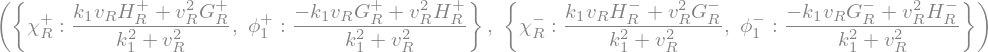

In [320]:
change_charged_higgs_plus = solve([eqGRp, eqHRp], [phi1p, chiRp])
change_charged_higgs_minus = solve([eqGRm, eqHRm], [phi1m, chiRm])
change_charged_higgs_plus, change_charged_higgs_minus

In [321]:
GLp = symbols(r'{{G_L^+}}')
HLp = symbols(r'{{H_L^+}}')
change_charged_higgs_plus[phi2p] = GLp
change_charged_higgs_plus[chiLp] = HLp

GLm = symbols(r'{{G_L^-}}')
HLm = symbols(r'{{H_L^-}}')
change_charged_higgs_minus[phi2m] = GLm
change_charged_higgs_minus[chiLm] = HLm

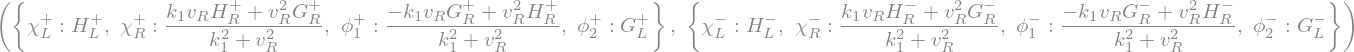

In [322]:
change_charged_higgs_plus, change_charged_higgs_minus

In [323]:
change_charged_higgs = {
    **change_charged_higgs_plus,
    **change_charged_higgs_minus
}

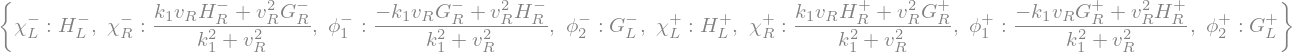

In [324]:
change_charged_higgs

In [325]:
VLRPhi_ri_tadpole_caso1_physical = VLRPhi_ri_tadpole_caso1.subs(change_charged_higgs)

In [326]:
vev_physical_charged_scalars = {
    GLp:0, GRp:0, HLp:0, HRp:0,
    GLm:0, GRm:0, HLm:0, HRm:0
}

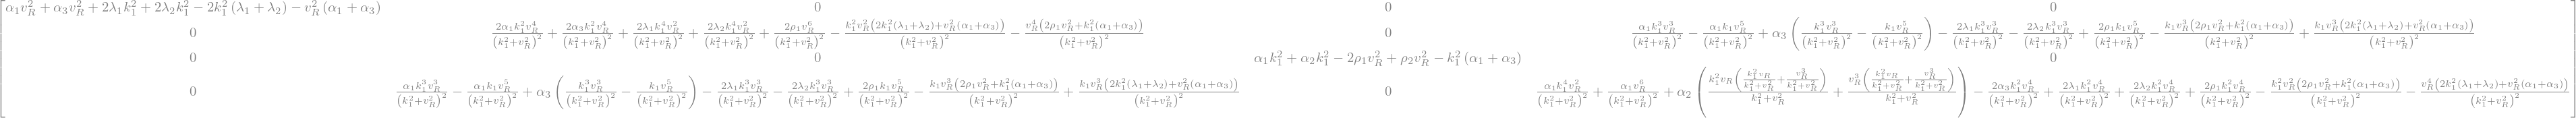

In [327]:
phip_fields = [GLp, GRp, HLp, HRp]

dummyconjugateGLp = Dummy(r'G_L^{+,d}')
dummyconjugateGRp = Dummy(r'G_R^{+,d}')
dummyconjugateHRp = Dummy(r'H_R^{+,d}')
dummyconjugateHLp = Dummy(r'H_L^{+,d}')

dummychangep = {
    conjugate(GLp):dummyconjugateGLp,
    conjugate(GRp):dummyconjugateGRp,
    conjugate(HRp):dummyconjugateHRp,
    conjugate(HLp):dummyconjugateHLp
}
phim_fields = [dummyconjugateGLp, dummyconjugateGRp, dummyconjugateHLp, dummyconjugateHRp] 
Mp_square_physical = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1_physical.subs(dummychangep), phim_fields), phip_fields)).subs(
    {value:key for key, value in dummychangep.items()}
).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2,0).subs(vL, 0).subs(vev_physical_charged_scalars)
Mp_square_physical

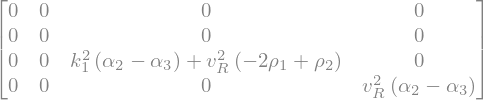

In [328]:
Mp_square_physical = Mp_square_physical.applyfunc(factor).applyfunc(lambda x:x.collect([k1, vR], factor))
Mp_square_physical

In [329]:
mHL, mHR = symbols('m_{H_L^+}, m_{H_R^+}', positive=True)

In [330]:

alpha12_rho12_masses_relations = solve(
    [
        mHL**2 - Mp_square_physical[2,2],
        mHR**2 - Mp_square_physical[3,3]
    ],
    [alpha2-alpha3, rho2-2*rho1], dict=True
)[0]

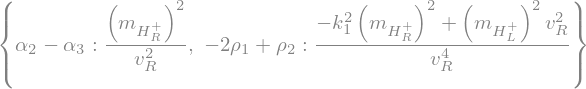

In [331]:
alpha12_rho12_masses_relations

In [332]:
for param, exp in alpha12_rho12_masses_relations.items():
    exp_factor = exp.factor()
    #display(exp_factor)
    alpha12_rho12_masses_relations[param] = exp_factor

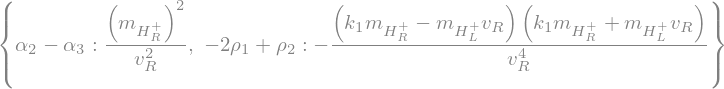

In [333]:
alpha12_rho12_masses_relations

### Neutral mass matrix

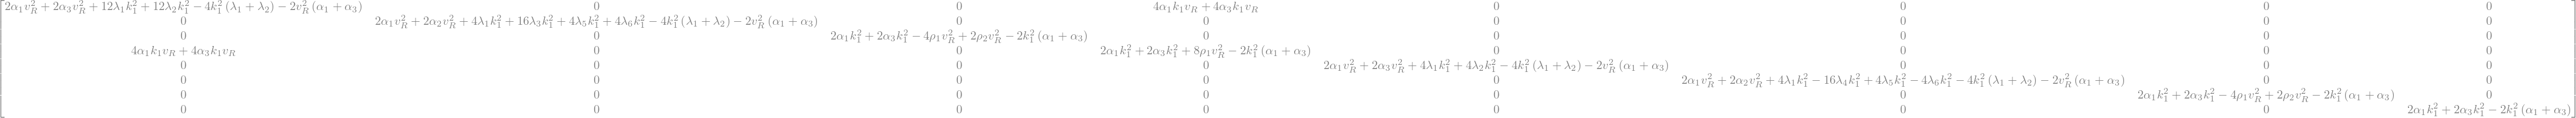

In [334]:
phir_fields = [phi10r, phi20r, chiL0r, chiR0r]
phii_fields = [phi10i, phi20i, chiL0i, chiR0i]
phiri_fields = phir_fields + phii_fields

MRI_square = (build_mass_matrix(VLRPhi_ri_tadpole_caso1, phiri_fields, phiri_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2,0).subs(vL, 0)
MRI_square

### Pseudocalar and goldstone

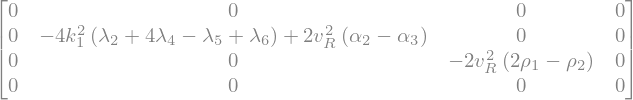

In [335]:
Mii = MRI_square[4:, 4:].applyfunc(lambda x:x.collect([k1, vR], factor))
Mii

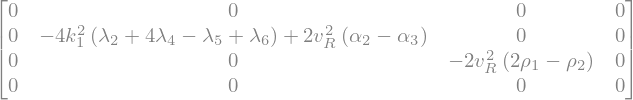

In [336]:
Mii

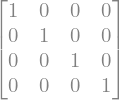

In [337]:
Pii = Matrix(
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
)
Pii

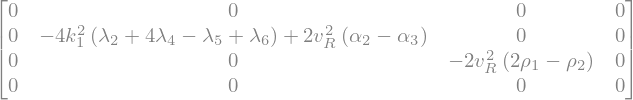

In [338]:
Dii = (Pii.T*Mii*Pii)
Dii

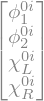

In [339]:
physical_pseudo_scalars = (Pii.T*Matrix(phii_fields)).applyfunc(factor)
physical_pseudo_scalars

In [340]:
A10 = symbols(r'{{A_1^0}}')
A20 = symbols(r'{{A_2^0}}')
GZ = symbols(r'{{G_Z}}')
GX = symbols(r'{{G_X}}')
eqA10 = Eq(A10, physical_pseudo_scalars[1])
eqA20 = Eq(A20, physical_pseudo_scalars[2])
eqGZ = Eq(GZ, physical_pseudo_scalars[0])
eqGX = Eq(GX, physical_pseudo_scalars[3])

In [341]:
change_pseudo_scalars = solve([eqA10, eqA20, eqGZ, eqGX], [chiL0i, chiR0i, phi10i, phi20i])
change_pseudo_scalars

In [342]:
mA10, mA20 = symbols('m_{A_1^0}, m_{A_2^0}', positive=True)
lamb2456 = lamb2 + 4*lamb4 - lamb5 + lamb6
lambdas2456_masses_relations = solve(
    [
        mA10**2 - Dii[1,1]
    ],
    [lamb2456], dict=True
)[0]

In [343]:
lambdas2456_masses_relations[lamb2456] = lambdas2456_masses_relations[lamb2456].factor()

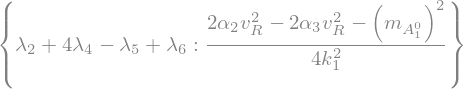

In [344]:
lambdas2456_masses_relations

In [345]:
rho12_relations = solve(
    [
        mA20**2 - Dii[2,2]
    ],
    [-2*rho1 + rho2], dict=True
)[0]

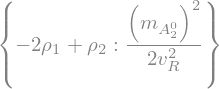

In [346]:
rho12_relations

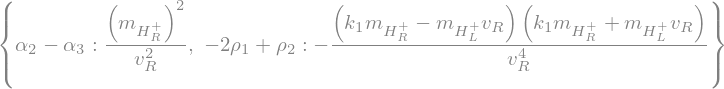

In [347]:
alpha12_rho12_masses_relations

### Scalars

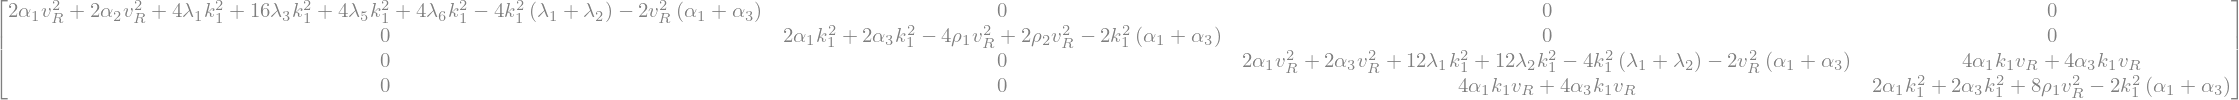

In [348]:
phir_fields = [phi20r, chiL0r, phi10r, chiR0r]

Mrr = (build_mass_matrix(VLRPhi_ri_tadpole_caso1, phir_fields, phir_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2,0).subs(vL, 0)
Mrr

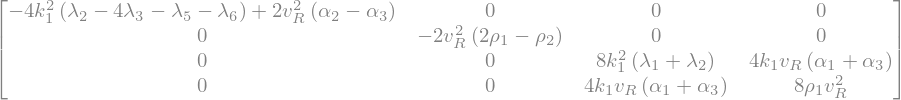

In [349]:
Mrr = Mrr.applyfunc(lambda x:x.collect([k1, vR], factor))
Mrr

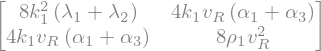

In [350]:
mrr_mix = Matrix(
    [
        [Mrr[2,2], Mrr[2,3]],
        [Mrr[3,2], Mrr[3,3]]
    ]
)
mrr_mix

In [351]:
from sympy import sin, cos, tan
th = symbols(r'\theta')

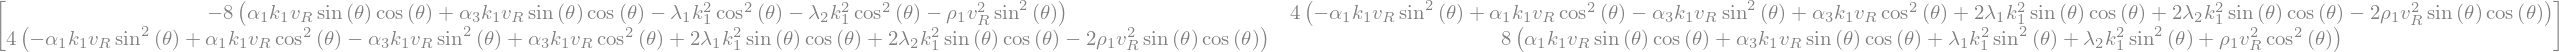

In [352]:
Oth = Matrix(
    [
        [cos(th), sin(th)],
        [-sin(th), cos(th)]
    ]
)

mrr_mix_rotate = (Oth.T*mrr_mix*Oth).applyfunc(factor)
mrr_mix_rotate

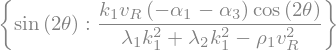

In [353]:
sin2th_sol = solve(mrr_mix_rotate[0,1].trigsimp(), sin(2*th), dict=True)[0]
sin2th_sol

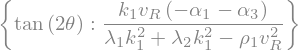

In [354]:
tan2th_sol = {tan(2*th): (sin(2*th)/cos(2*th)).subs(sin2th_sol)}
tan2th_sol

In [355]:
from sympy import series
#epsilon = symbols(r'\epsilon')

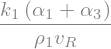

In [356]:
tan2th_approx = series(tan2th_sol[tan(2*th)].subs(k1, epsilon*vR), x=epsilon, x0=0, n=2).removeO().factor().subs(epsilon, k1/vR)
tan2th_approx

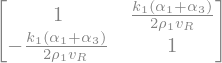

In [357]:
Oth_approx = Oth.subs(sin(th), tan2th_approx/2).subs(cos(th), 1)
Oth_approx


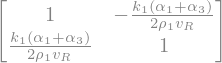

In [358]:
Oth_approx_inv = (Oth.T).subs(sin(th), tan2th_approx/2).subs(cos(th), 1)
Oth_approx_inv

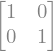

In [359]:
(Oth_approx_inv*Oth_approx).subs(k1, epsilon*vR).subs(epsilon, 0)

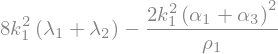

In [360]:
mH10_square = mrr_mix_rotate[0,0].subs(sin(th), tan2th_approx/2).subs(cos(th), 1).expand().collect(rho1, factor)
mH10_square

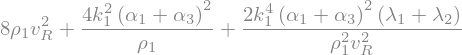

In [361]:
mH20_square = mrr_mix_rotate[1,1].subs(sin(th), tan2th_approx/2).subs(cos(th), 1).expand().collect(rho1, factor)
mH20_square

In [362]:
mH10, mH20, mH30, mH40 = symbols('m_{H_1^0}, m_{H_2^0}, m_{H_3^0}, m_{H_4^0}', positive=True)

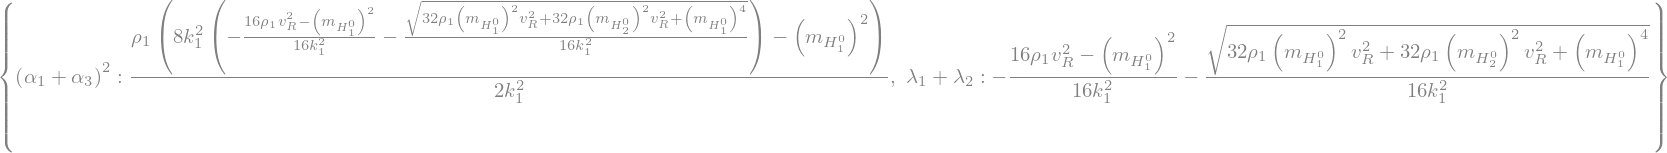

In [363]:
alpha13_lamb12_sol = solve(
    [
        Eq(mH10_square, mH10**2),
        Eq(mH20_square, mH20**2)
    ], 
    [(alpha1 + alpha3)**2, lamb1 + lamb2], dict=True
)[0]
alpha13_lamb12_sol

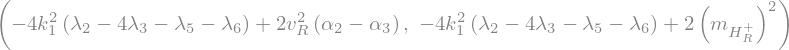

In [364]:
mH30_square = Mrr[0,0]
mH30_square, mH30_square.subs(alpha12_rho12_masses_relations)

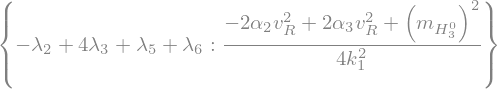

In [365]:
lamb2356_sol = solve(Eq(mH30_square, mH30**2), - lamb2 + 4*lamb3 + lamb5 + lamb6, dict=True)[0]
lamb2356_sol

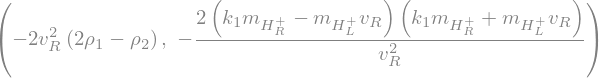

In [366]:
mH40_square = Mrr[1,1]
mH40_square, mH40_square.subs(alpha12_rho12_masses_relations)

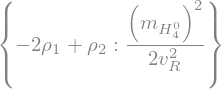

In [367]:
rho21_neutral_sol = solve(Eq(mH40_square, mH40**2), rho2 - 2*rho1, dict=True)[0]
rho21_neutral_sol

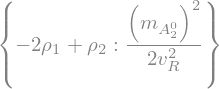

In [368]:
rho12_relations

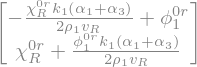

In [369]:
physical_scalars = Oth_approx_inv*Matrix(
    [
        [phi10r],
        [chiR0r]
    ]
)
physical_scalars

In [370]:
H10 = symbols(r'{{H_1^0}}')
H20 = symbols(r'{{H_2^0}}')
H30 = symbols(r'{{H_3^0}}')
H40 = symbols(r'{{H_4^0}}')
eqH10 = Eq(H10, physical_scalars[0])
eqH20 = Eq(H20, physical_scalars[1])
eqH30 = Eq(H30, phi20r)
eqH40 = Eq(H40, chiL0r)


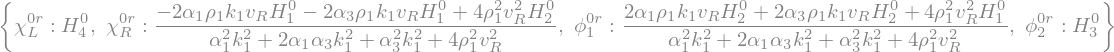

In [371]:
change_scalars = solve([eqH10, eqH20, eqH30, eqH40], [chiL0r, chiR0r, phi10r, phi20r], dict=True)[0]
change_scalars

In [372]:
for key, value in change_scalars.items():
    change_scalars[key] = value.factor(deep=True)

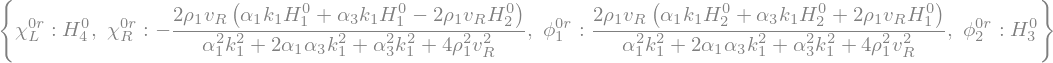

In [373]:
change_scalars

In [374]:
change_scalar_fields = {
    **change_scalars,
    **change_pseudo_scalars,
    **change_charged_higgs
}

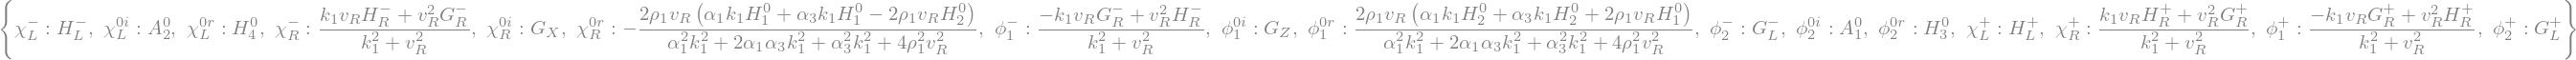

In [375]:
change_scalar_fields

# Gauge Higgs interactions

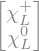

In [376]:
ChiL

In [377]:
ChiL = ChiL.subs(complex_scalar_fields).subs(change_scalar_fields)
ChiR = ChiR.subs(complex_scalar_fields).subs(change_scalar_fields)

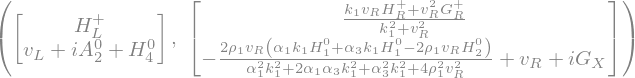

In [378]:
ChiL, ChiR

In [379]:
Phi = Phi.subs(complex_scalar_fields).subs(change_scalar_fields)

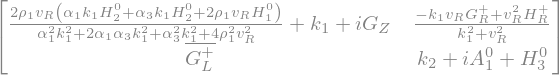

In [380]:
Phi

## Covariant derivative

### Higgs doublets 

In [381]:
from sympy import Add

In [382]:
g, gBL = symbols('g, g_{B-L}', positive=True)
W1L, W2L, W3L = symbols('W^1_L, W^2_L, W^3_L', real=True)
WL = [W1L, W2L, W3L]
W1R, W2R, W3R = symbols('W^1_R, W^2_R, W^3_R', real=True)
WR = [W1R, W2R, W3R]
Bmu = symbols(r'B_\mu', real=True)
B, L = symbols(r'B, L', real=True)

In [383]:
WsigmaL = Add(*[WL[i]*msigma(i+1) for i in range(3)])
WsigmaR = Add(*[WR[i]*msigma(i+1) for i in range(3)])

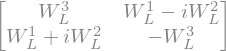

In [384]:
WsigmaL

In [385]:
WLp, WLm, WRp, WRm = symbols('W_L^+, W_L^-, W_R^+, W_R^-')
Wcharge_subs = {
    W1L - I*W2L:WLp,
    W1L + I*W2L:WLm,
    W1R - I*W2R:WRp,
    W1R + I*W2R:WRm
}

In [386]:
WsigmaL, WsigmaR = WsigmaL.subs(Wcharge_subs), WsigmaR.subs(Wcharge_subs)

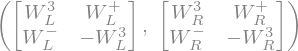

In [387]:
WsigmaL, WsigmaR

In [388]:
DmuL = -I*g/2*WsigmaL - I*gBL/2*Bmu*eye(2)
DmuR = -I*g/2*WsigmaR - I*gBL/2*Bmu*eye(2)

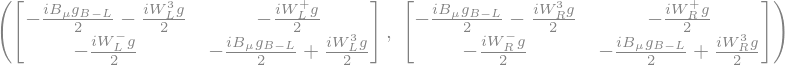

In [389]:
DmuL, DmuR

In [390]:
Dmu_ChiL = DmuL*ChiL 
Dmu_ChiR = DmuR*ChiR

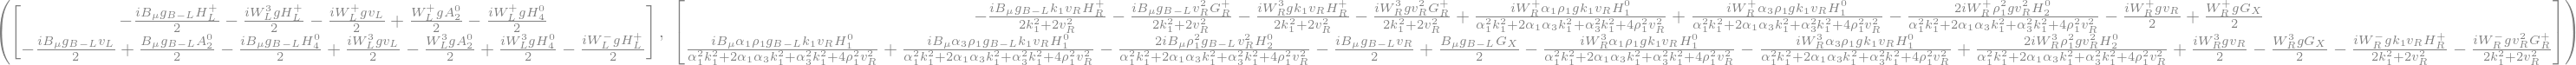

In [391]:
Dmu_ChiL.applyfunc(lambda x:x.expand()), Dmu_ChiR.applyfunc(lambda x:x.expand())

In [392]:
HLm = symbols('{{H_L^-}}')
HRm = symbols('{{H_R^-}}')
GLm = symbols('{{G_L^-}}')
GRm = symbols('{{G_R^-}}')

In [393]:
conjugate_fields = {
    conjugate(HLp):HLm,
    conjugate(HLm):HLp,
    conjugate(HRm):HRp,
    conjugate(HRp):HRm,
    conjugate(GLp):GLm,
    conjugate(GLm):GLp,
    conjugate(GRm):GRp,
    conjugate(GRp):GRm,
    conjugate(WLp):WLm,
    conjugate(WLm):WLp,
    conjugate(WRm):WRp,
    conjugate(WRp):WRm,
    conjugate(H10):H10,
    conjugate(H20):H20,
    conjugate(H30):H30,
    conjugate(H40):H40,
    conjugate(A10):A10,
    conjugate(A20):A20,
    conjugate(GZ):GZ,
    conjugate(GX):GX,
}

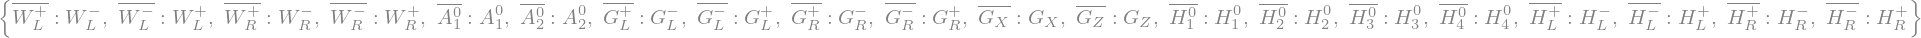

In [394]:
conjugate_fields

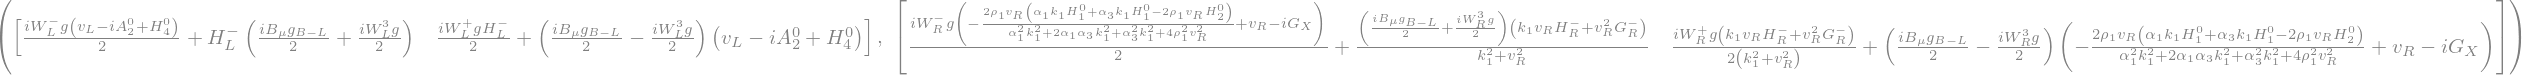

In [395]:
Dmu_ChiL_dagger = Dagger(Dmu_ChiL).subs(conjugate_fields)
Dmu_ChiR_dagger = Dagger(Dmu_ChiR).subs(conjugate_fields)

Dmu_ChiL_dagger, Dmu_ChiR_dagger

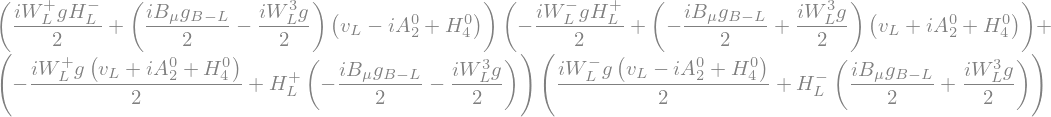

In [396]:
Dmu_ChiL_square = (Dmu_ChiL_dagger*Dmu_ChiL)[0]
Dmu_ChiL_square


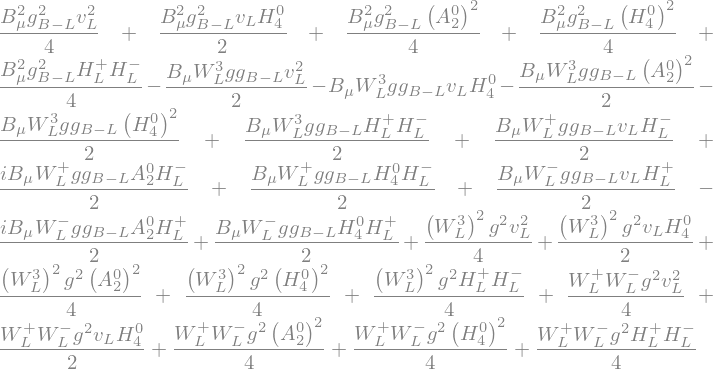

In [397]:
Dmu_ChiL_square.expand()

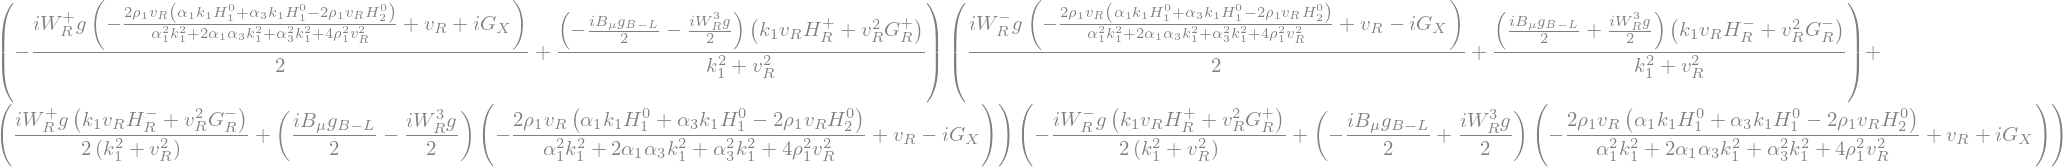

In [398]:
Dmu_ChiR_square = (Dmu_ChiR_dagger*Dmu_ChiR)[0]
Dmu_ChiR_square

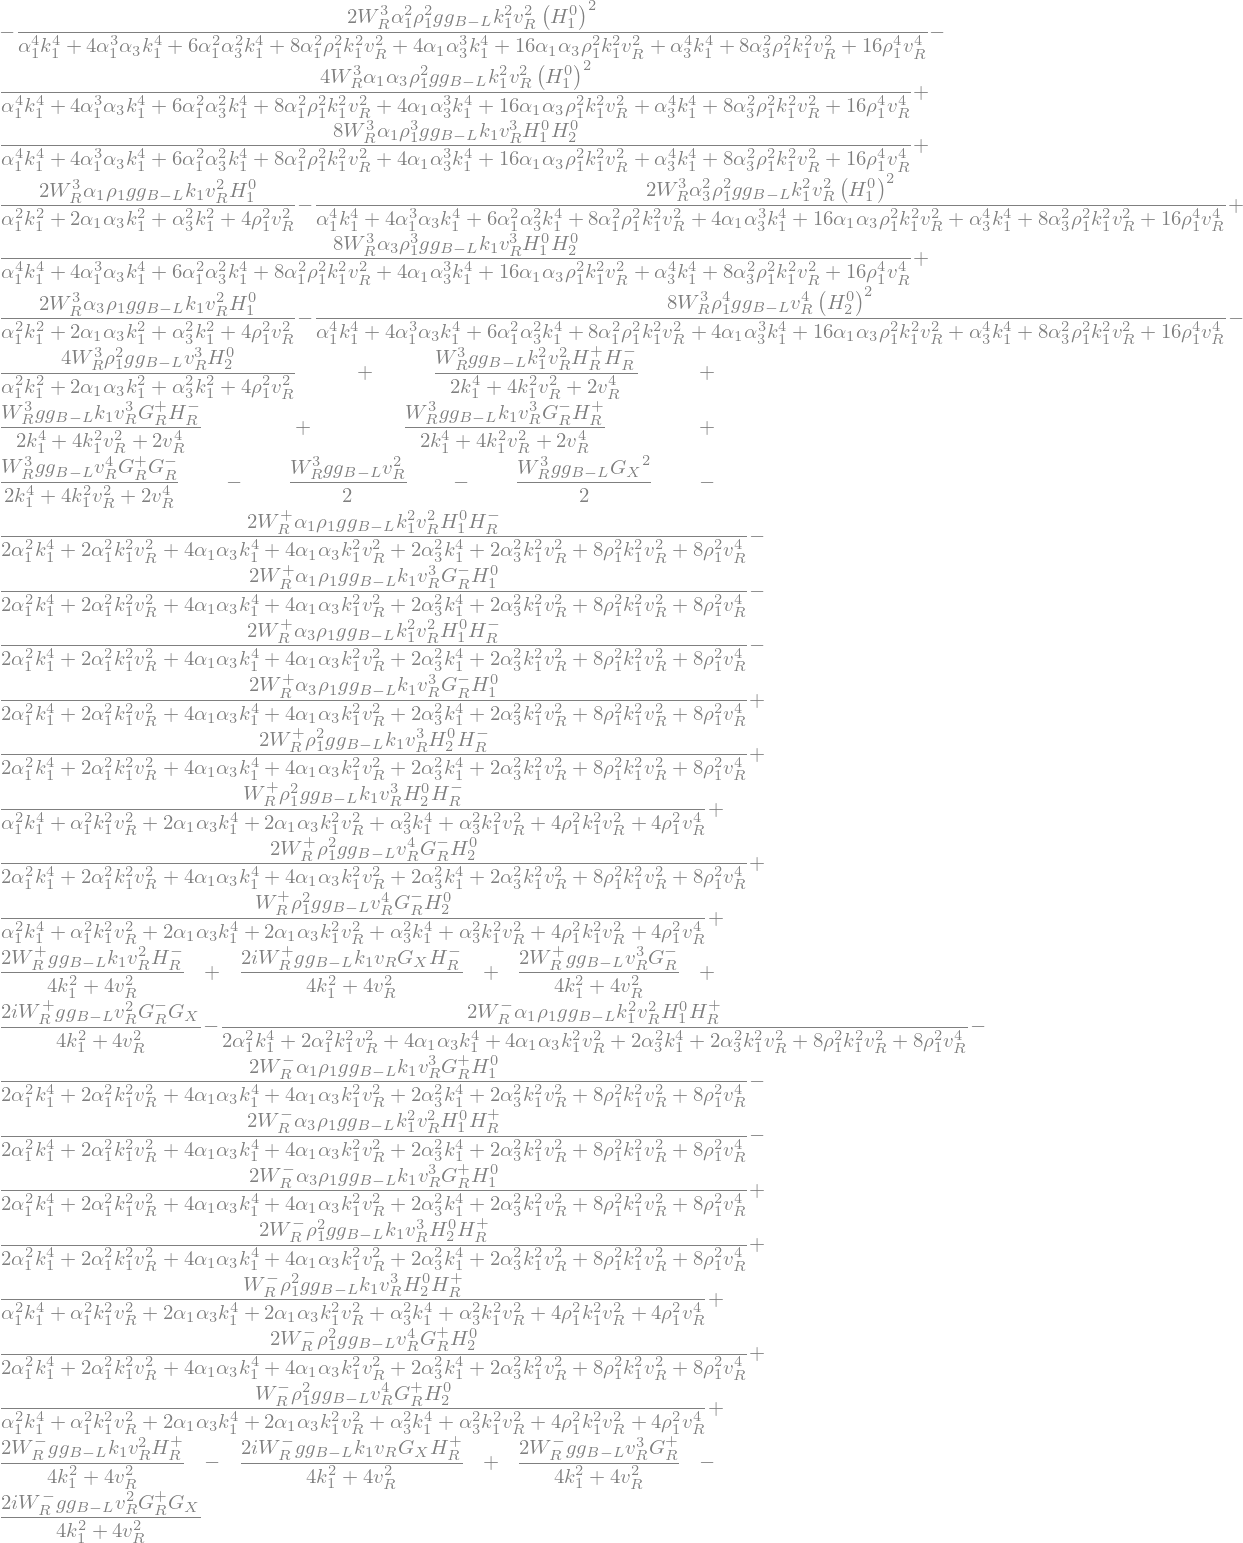

In [399]:
Dmu_ChiR_square.expand().coeff(Bmu)

### Bidoublet

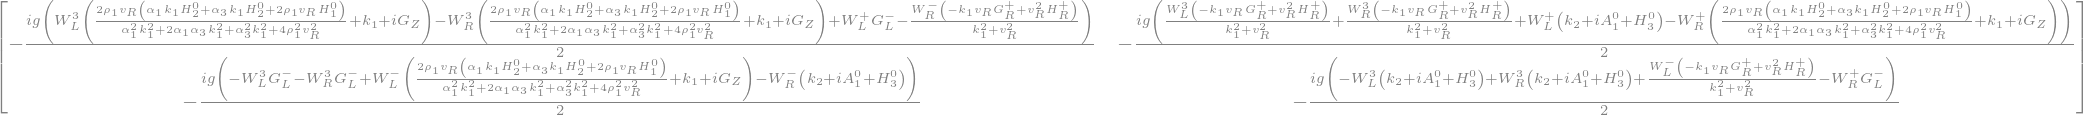

In [400]:
Dmu_Phi = -I*g/2*(WsigmaL*Phi - Phi*WsigmaR).subs(conjugate_fields) # B - L = 0 for the bidoublet
Dmu_Phi

In [401]:
phi1m = symbols(r'{{\phi_1^-}}')
phi2m = symbols(r'{{\phi_2^-}}')

In [402]:
conjugate_scalarsPhi = {
    conjugate(phi1p):phi1m,
    conjugate(phi2p):phi2m,
    conjugate(phi1m):phi1p,
    conjugate(phi2m):phi2p
}

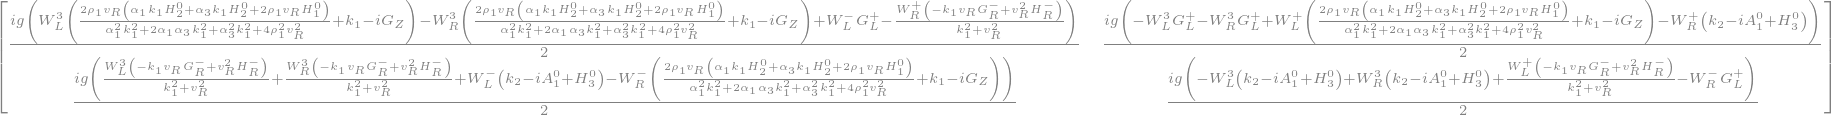

In [403]:
Dmu_Phi_dagger = Dagger(Dmu_Phi).subs(conjugate_scalarsPhi).subs(conjugate_fields)
Dmu_Phi_dagger

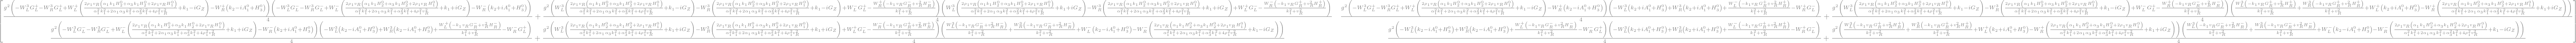

In [404]:
Dmu_Phi_Dmu = (Dmu_Phi_dagger*Dmu_Phi)#.subs(vevPhi)
Dmu_Phi_Dmu

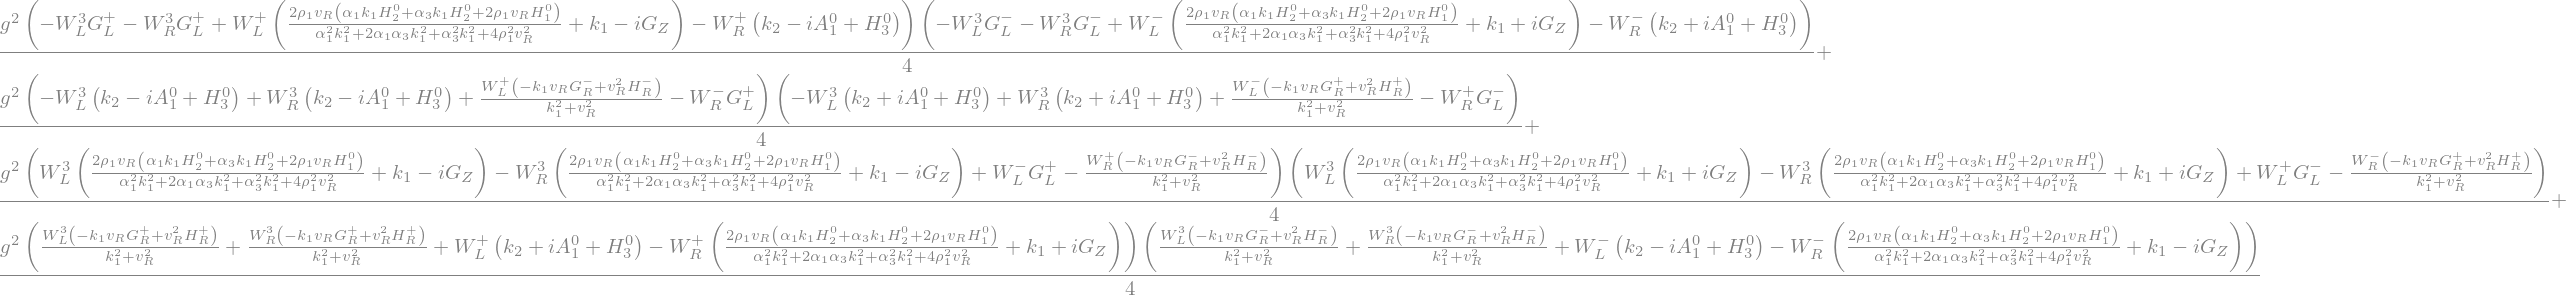

In [405]:
Tr_DmuPhi = trace(Dmu_Phi_Dmu)
Tr_DmuPhi 

In [406]:
#Tr_DmuPhi.expand().coeff(W3R)

## Kinetic Lagrangian of scalars

In [407]:
LHiggs = Dmu_ChiL_square + Dmu_ChiR_square + Tr_DmuPhi 

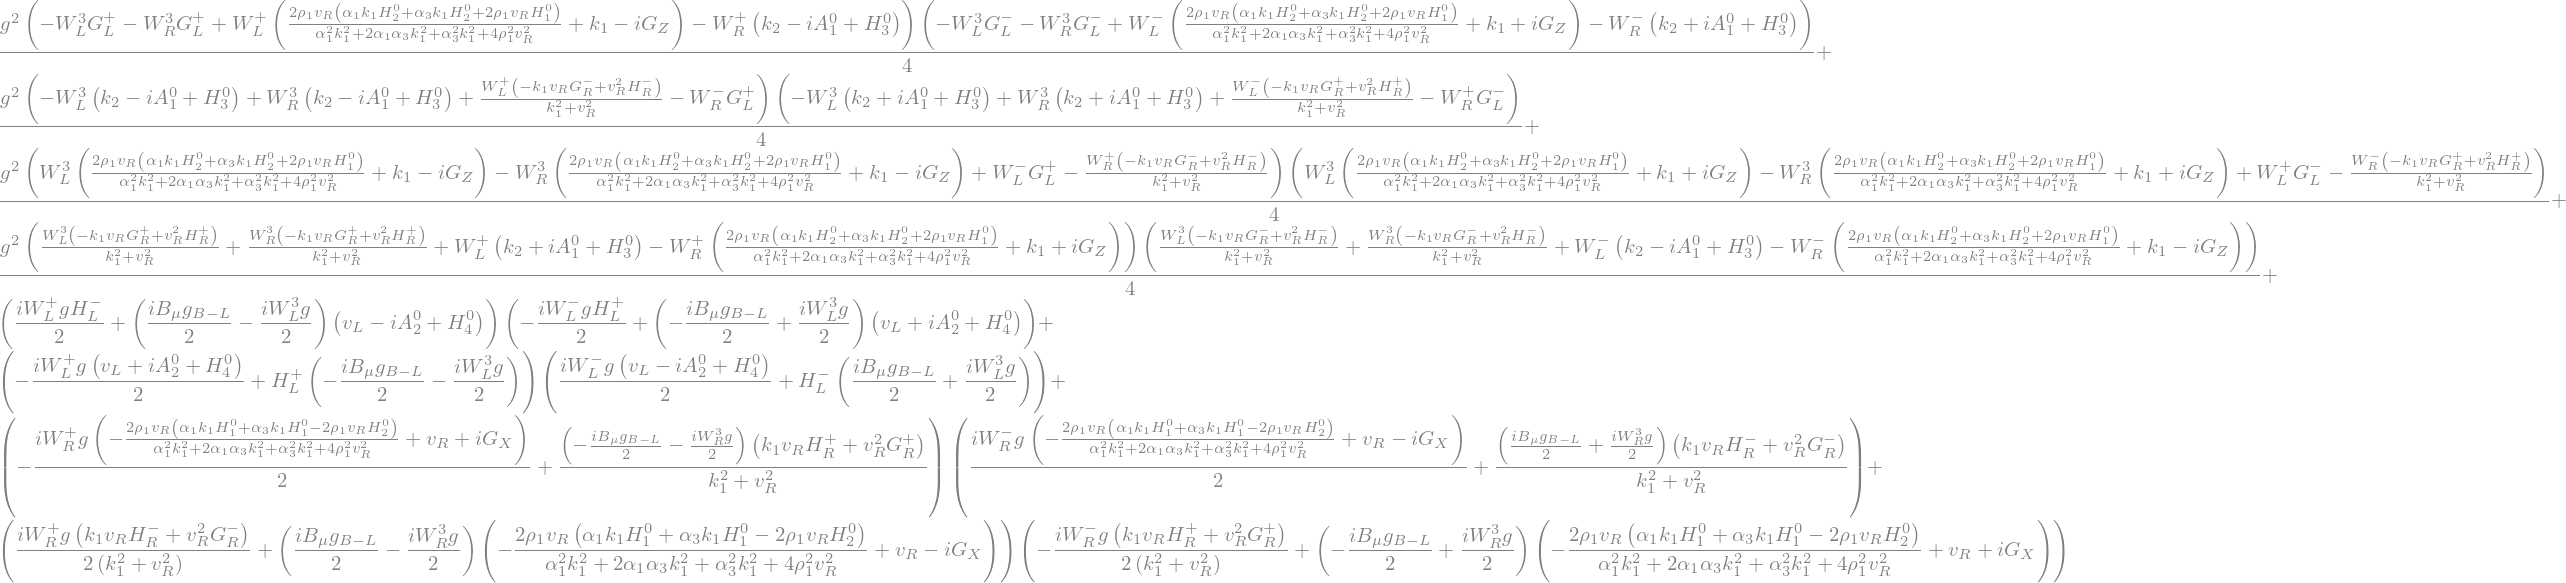

In [408]:
LHiggs

### $W^\pm$ mass matrix

In [409]:
vev_physical_charged_scalars

In [410]:
vev_physical_charged_scalars[GLm] = 0
vev_physical_charged_scalars[GRm] = 0
vev_physical_charged_scalars[HLm] = 0
vev_physical_charged_scalars[GLm] = 0
vev_physical_charged_scalars[A10] = 0
vev_physical_charged_scalars[A20] = 0
vev_physical_charged_scalars[H10] = 0
vev_physical_charged_scalars[H20] = 0
vev_physical_charged_scalars[H30] = 0
vev_physical_charged_scalars[H40] = 0
vev_physical_charged_scalars[GZ] = 0
vev_physical_charged_scalars[GX] = 0

In [411]:
vev_physical_charged_scalars

In [412]:
LHiggs.free_symbols

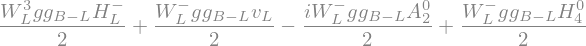

In [413]:
(LHiggs.expand().coeff(Bmu).coeff(HLp))

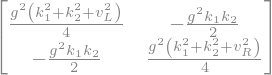

In [414]:
MW11 = LHiggs.diff(WLm, WLp)
MW12 = LHiggs.diff(WLm, WRp)
MW21 = LHiggs.diff(WRm, WLp)
MW22 = LHiggs.diff(WRm, WRp)

MW = Matrix(
    [
        [MW11, MW12],
        [MW21, MW22]
    ]
).subs(vev_physical_charged_scalars).subs(vevL).subs(vevR)
MW

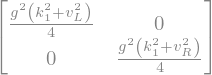

In [415]:
MW11_k2_0 = LHiggs.diff(WLm, WLp).subs(k2, 0)
MW12_k2_0 = LHiggs.diff(WLm, WRp).subs(k2, 0)
MW21_k2_0 = LHiggs.diff(WRm, WLp).subs(k2, 0)
MW22_k2_0 = LHiggs.diff(WRm, WRp).subs(k2, 0)

MW_k2_0 = Matrix(
    [
        [MW11_k2_0, MW12_k2_0],
        [MW21_k2_0, MW22_k2_0]
    ]
).subs(vev_physical_charged_scalars).subs(vevL).subs(vevR)
MW_k2_0

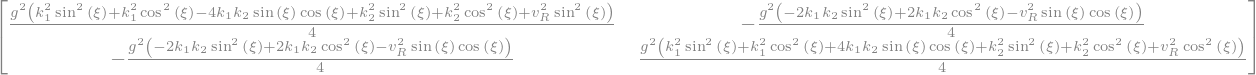

In [416]:
xi = symbols(r'\xi')
Oxi = Matrix(
    [
        [cos(xi), -sin(xi)],
        [sin(xi), cos(xi)]
    ]
)

MW_rotate = (Oxi.T*MW.subs(vL,0)*Oxi).applyfunc(factor)
MW_rotate

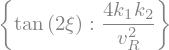

In [417]:
sin2xi_sol = solve(MW_rotate[0,1].trigsimp(), sin(2*xi), dict=True)[0]
sin2xi_sol
tan2xi_sol = {tan(2*xi): (sin(2*xi)/cos(2*xi)).subs(sin2xi_sol)}
tan2xi_sol

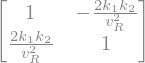

In [418]:
Oxi_approx = Oxi.subs(sin(xi), tan2xi_sol[tan(2*xi)]/2).subs(cos(xi), 1)
Oxi_approx

Then, we have a mixing amon two charged gauge bosons
$$
W_{L}^{\pm}=	\cos\left(\xi\right)W_{1}^{+}-\sin\left(\xi\right)W_{2}^{+}\\
W_{R}^{\pm}=	\cos\left(\xi\right)W_{2}^{+}+\sin\left(\xi\right)W_{1}^{+}
$$

In [419]:
W1p, W2p = symbols('W_1^+, W_2^+')
W1m, W2m = symbols('W_1^-, W_2^-')

W12p_doublet = Matrix(
    [
        [W1p],
        [W2p]
    ]
)
W12p_doublet
mixingW12 = Oxi*W12p_doublet
mixingW12
WLp_mix = mixingW12[0]
WRp_mix = mixingW12[1]
WLp_mix, WRp_mix

In [420]:
change_charged_bosons = {
    WLp:WLp_mix, WRp:WRp_mix,
    WLm:WLp_mix.subs(W1p, W1m).subs(W2p, W2m), WRm:WRp_mix.subs(W1p, W1m).subs(W2p, W2m)
}
change_charged_bosons

### Neutral gaube bosons

In [421]:
WLWRB = [W3L, W3R, Bmu]
M0_square = derive_by_array(derive_by_array(LHiggs, WLWRB), WLWRB).simplify().tomatrix()/2
M0_square = M0_square.subs(vev_physical_charged_scalars).subs(vevL).subs(vevR)

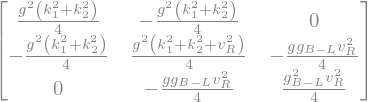

In [422]:
M0_square_vL0 = M0_square.applyfunc(factor).subs(vL,0)
M0_square_vL0

In [423]:
M0_square_vL0.det()

In [424]:
M0_eigenvals = M0_square_vL0.eigenvals()

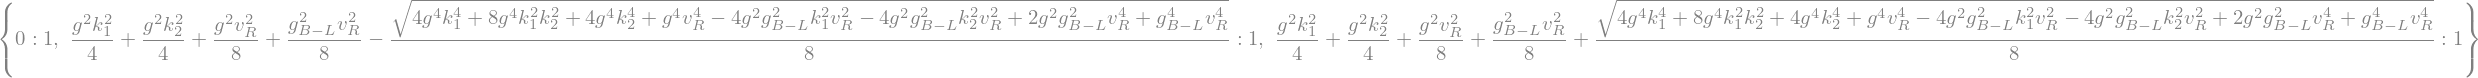

In [425]:
M0_eigenvals

In [426]:
M0_eigenvects = M0_square_vL0.eigenvects()

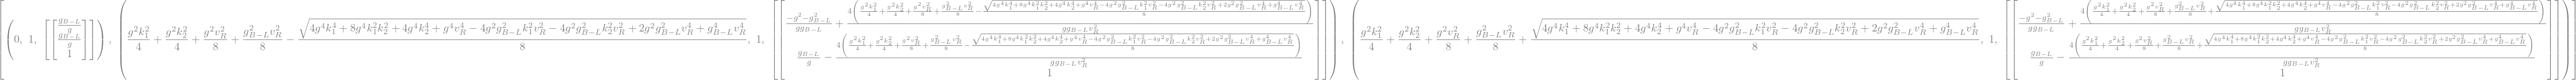

In [427]:
M0_eigenvects

In [428]:
P0 = Matrix.hstack(*[eigeninfo[2][0]/(eigeninfo[2][0]).norm() for eigeninfo in M0_eigenvects])


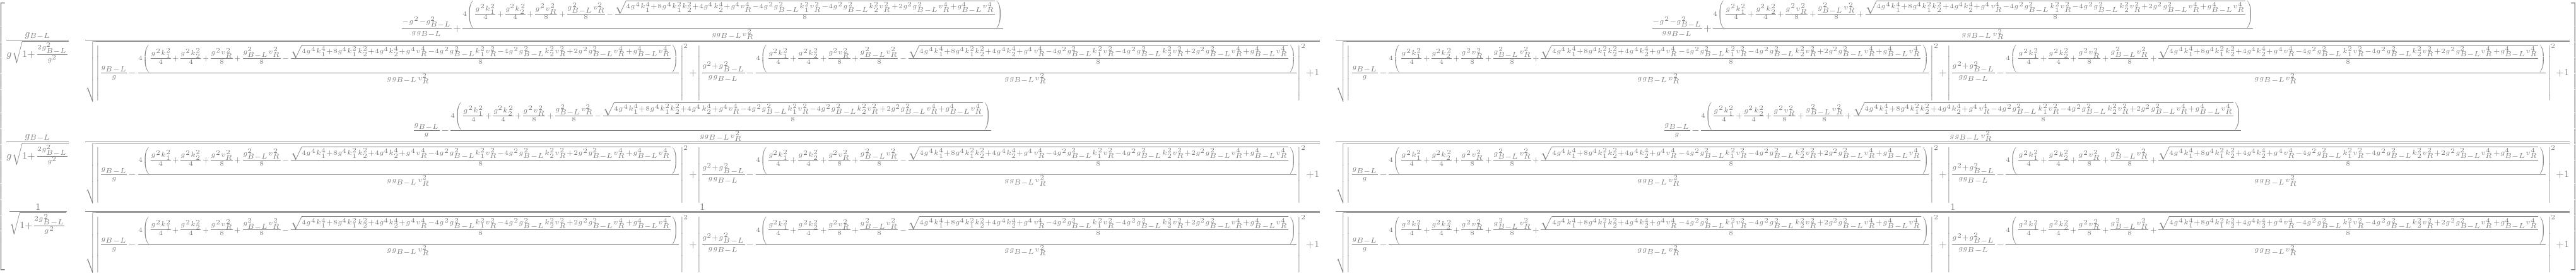

In [429]:
P0

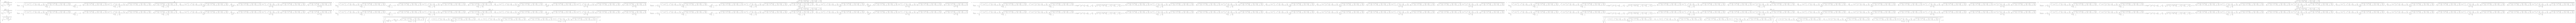

In [430]:
P0_approx = P0.applyfunc(
    lambda x: x.subs(k1, epsilon*vR).series(x=epsilon, x0=0, n=2).removeO().subs(epsilon, k1/vR)
).applyfunc(
    lambda x: x.subs(k2, epsilon*vR).series(x=epsilon, x0=0, n=2).removeO().subs(epsilon, k2/vR)
)
P0_approx

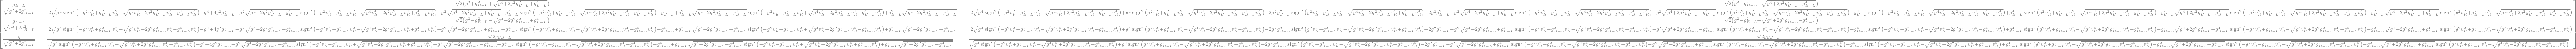

In [431]:
P0_approx.applyfunc(factor)

In [432]:
sqrt_P0 = P0_approx[0,1].args[0].args[3].args[0].args[3].args[-1].args[0].args[0].args[0].args[0]
sqrt_P0

In [433]:
sqrt_P0_factor = sqrt_P0.factor()
sqrt_P0_factor

In [434]:
P0_approx = P0_approx.subs(sqrt_P0, sqrt_P0_factor).applyfunc(factor)

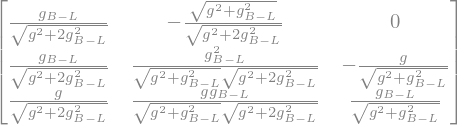

In [435]:
P0_approx

In [436]:
v1 = (P0_approx.col(0)/P0_approx.col(0).norm()).applyfunc(factor)
v2 = (P0_approx.col(1)/P0_approx.col(1).norm()).applyfunc(factor)
v3 = (P0_approx.col(2)/P0_approx.col(2).norm()).applyfunc(factor)

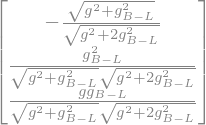

In [437]:
v2#.subs(g_changes).applyfunc(lambda x:x.trigsimp())

In [438]:
P0_approx2 = Matrix.hstack(v1, v2, v3)

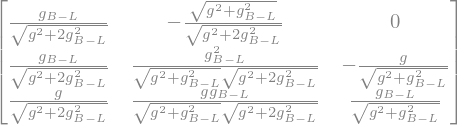

In [439]:
P0_approx2

with the definition $e = g \sin{\theta_W}$ and 
$$\frac{1}{e^2} = \frac{2}{g^2} + \frac{1}{g_{B-L}^2}$$

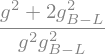

In [440]:
e_square_inv = (2/g**2+ 1/gBL**2).factor()
e_square_inv

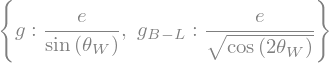

In [441]:
e = symbols('e', positive=True)
thw = symbols(r'\theta_W')
g_changes = {
    g:e/sin(thw),
    gBL:e/sqrt(cos(2*thw))
}
g_changes

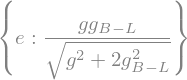

In [442]:
e_sol = solve(Eq(1/e**2, e_square_inv), e, dict=True)[0]
e_sol

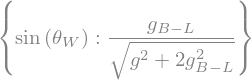

In [443]:
sinthw_sol_ggBL =  solve((1/e).subs(e_sol) - 1/(g*sin(thw)), sin(thw), dict=True)[0]
sinthw_sol_ggBL

Remember the trigonometric identity $\cos{\theta_W}^2 = 1 - \sin{\theta_W}^2$

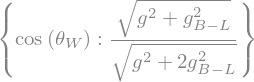

In [444]:
costhw_sol_ggBL = solve(Eq(cos(thw)**2, (1-sin(thw)**2).subs(sinthw_sol_ggBL)), cos(thw), dict=True)[1]
costhw_sol_ggBL

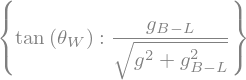

In [445]:
tanthw_sol_ggBL = {tan(thw): (sin(thw)/cos(thw)).subs(sinthw_sol_ggBL).subs(costhw_sol_ggBL)}
tanthw_sol_ggBL

Also, with the identity $\cos{2\theta_W} = \cos{\theta_W}^2 - \sin{\theta_W}^2$

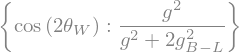

In [446]:
cos2thw_sol_ggBL = solve(
    Eq(cos(2*thw), (cos(thw)**2 - sin(thw)**2).subs(sinthw_sol_ggBL).subs(costhw_sol_ggBL)), 
    cos(2*thw), dict=True
)[0]
cos2thw_sol_ggBL

In [447]:
cos2thw_sol_ggBL[sqrt(cos(2*thw))] = sqrt(cos2thw_sol_ggBL[cos(2*thw)])

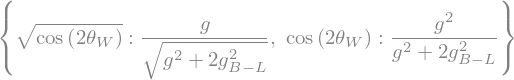

In [448]:
cos2thw_sol_ggBL

Finally, we have $1 - \tan^2{\theta_W} = 1 - \frac{\sin^2{\theta_W}}{\cos^2{\theta_W}}=\frac{\cos^2{\theta_W} - \sin^2{\theta_W}}{\cos^2{\theta_W}} = \frac{\cos{2\theta_W}}{\cos^2{\theta_W}}$

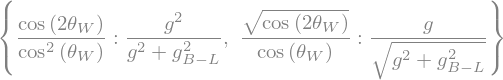

In [449]:
cos2thw_cosW_square_sol_ggBL = {
    cos(2*thw)/cos(thw)**2: (cos(2*thw)/cos(thw)**2).subs(cos2thw_sol_ggBL).subs(costhw_sol_ggBL)
}
cos2thw_cosW_square_sol_ggBL[sqrt(cos(2*thw))/cos(thw)] = sqrt(cos2thw_cosW_square_sol_ggBL[cos(2*thw)/cos(thw)**2]).expand()
cos2thw_cosW_square_sol_ggBL


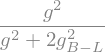

In [450]:
(1-2*sin(thw)**2).subs(sinthw_sol_ggBL).simplify()

In [451]:
def invert_dict(dictionary):
    """Invert a dictionary, swapping keys and values."""
    inverted_dict = {}
    for key, value in dictionary.items():
        inverted_dict[value] = key
    return inverted_dict

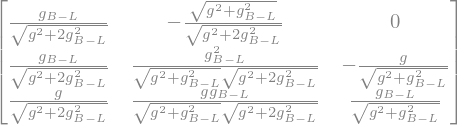

In [452]:
P0_approx2

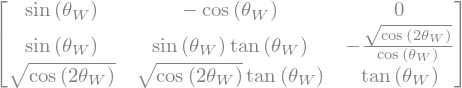

In [453]:
P0_approx2_angles = P0_approx2.subs(
    invert_dict(costhw_sol_ggBL)
).subs(
    invert_dict(sinthw_sol_ggBL)
).subs(
    invert_dict(tanthw_sol_ggBL)
).subs(
    invert_dict(cos2thw_cosW_square_sol_ggBL)
).applyfunc(lambda x:x.trigsimp()).subs(
    invert_dict(cos2thw_sol_ggBL)
)
P0_approx2_angles


In [454]:
P0_approx2_angles_inv = P0_approx2_angles.inv().applyfunc(lambda x:x.trigsimp()) #P0_approx2.inv()

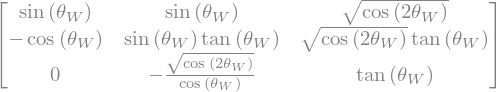

In [455]:
P0_approx2_angles_inv

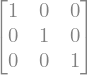

In [456]:
(P0_approx2_angles_inv*P0_approx2_angles).applyfunc(
    lambda x:x.trigsimp().collect(tan(thw)**2, lambda x:x.trigsimp().collect(cos(thw)**2, factor))
).subs(
    tan(thw)**2, 1/cos(thw)**2 - 1
).applyfunc(factor)

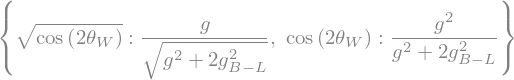

In [457]:
cos2thw_sol_ggBL

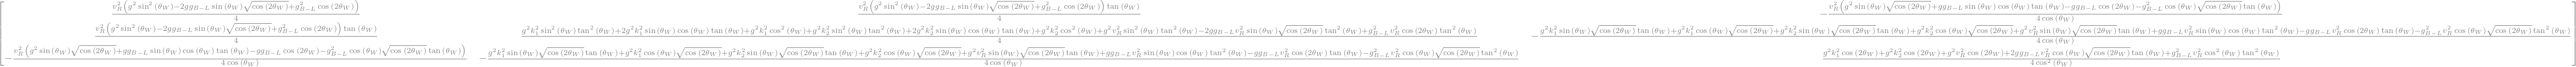

In [458]:
M0_square_vL0_rotation1 = (P0_approx2_angles_inv*M0_square_vL0*P0_approx2_angles).applyfunc(factor)
M0_square_vL0_rotation1

In [459]:
M0_square_vL0_rotation1[0,0] = M0_square_vL0_rotation1[0,0].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

In [460]:
M0_square_vL0_rotation1[0,1] = M0_square_vL0_rotation1[0,1].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

In [461]:
M0_square_vL0_rotation1[0,2] = M0_square_vL0_rotation1[0,2].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

In [462]:
M0_square_vL0_rotation1[1,0] = M0_square_vL0_rotation1[1,0].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

In [463]:
M0_square_vL0_rotation1[2,0] = M0_square_vL0_rotation1[2,0].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

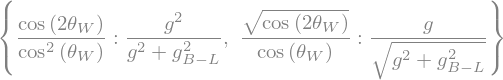

In [464]:
cos2thw_cosW_square_sol_ggBL

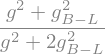

In [465]:
costhw_sol_ggBL[cos(thw)]**2

In [466]:
M0_square_vL0_rotation1[1,1] = (M0_square_vL0_rotation1[1,1].subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).factor(deep=True)*4/(g**2*(k1**2 + k2**2))).subs(
    1/costhw_sol_ggBL[cos(thw)]**2, 1/cos(thw)**2
)*((g**2*(k1**2 + k2**2))/4)

In [467]:
M0_square_vL0_rotation1[1,2] = M0_square_vL0_rotation1[1,2].subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).factor(deep=True).subs(
    sqrt(g**2 + 2*gBL**2), gBL/sin(thw)
).subs(
    g**2 + gBL**2, g**2*cos(thw)**2/cos(2*thw) 
).subs(
    4*sin(thw)*cos(thw)**2, 2*(sin(2*thw))*cos(thw)
).trigsimp()

In [468]:
M0_square_vL0_rotation1[2,1] = M0_square_vL0_rotation1[2,1].subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).factor(deep=True).subs(
    sqrt(g**2 + 2*gBL**2), gBL/sin(thw)
).subs(
    g**2 + gBL**2, g**2*cos(thw)**2/cos(2*thw) 
).subs(
    4*sin(thw)*cos(thw)**2, 2*(sin(2*thw))*cos(thw)
).trigsimp()

In [469]:
M0_square_vL0_rotation1[2,2] = M0_square_vL0_rotation1[2,2].subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).factor(deep=True).collect(vR, factor).subs(
    g**2 + gBL**2, g**2*cos(thw)**2/cos(2*thw) 
).expand().collect(vR, factor)

With the identity $sin^2{\theta_W} = \frac{1}{2}(1 - \cos{2\theta_W})$

In [470]:
from sympy import S

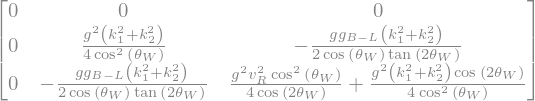

In [471]:
M0_square_vL0_rotation1

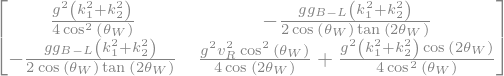

In [472]:
m0_square_vL0_rotation1 = M0_square_vL0_rotation1[1:, 1:]
m0_square_vL0_rotation1

In [473]:
mZ1, mZ2 = list(m0_square_vL0_rotation1.eigenvals().keys())

In [474]:
mZ12_plus = mZ1 + mZ2
mZ12_minus = mZ2 - mZ1

In [475]:
mz12_sqrt = mZ12_minus.args[3].args[0]

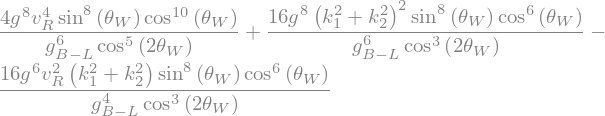

In [476]:
mz12_sqrt_simplify = mz12_sqrt.factor(deep=True).expand(trig=True).subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).expand().collect(vR, factor).subs(
    g**2 + gBL**2, g**2*cos(thw)**2/cos(2*thw) 
).subs(
    sqrt(g**2 + 2*gBL**2), gBL/sin(thw)
)
mz12_sqrt_simplify

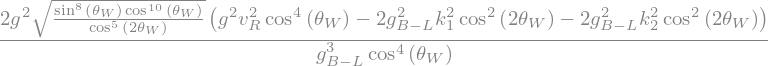

In [477]:
mz12_sqrt_simplify_high_approx = sqrt(mz12_sqrt_simplify).subs(k1**2 + k2**2, epsilon*vR).series(x=epsilon, x0=0, n=2).removeO().subs(
    epsilon, (k1**2 + k2**2)/vR
).factor()
mz12_sqrt_simplify_high_approx

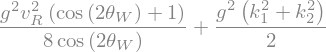

In [478]:
mZ12_plus_simplify = mZ12_plus.expand().collect(vR, factor).subs(cos(thw)**2, (1 + cos(2*thw))/2).collect(vR, factor)
mZ12_plus_simplify

In [479]:
mZ1 = mZ1.subs(mZ12_plus, mZ12_plus_simplify).subs(
    sqrt(mz12_sqrt), mz12_sqrt_simplify_high_approx
)
mZ2 = mZ2.subs(mZ12_plus, mZ12_plus_simplify).subs(
    sqrt(mz12_sqrt), mz12_sqrt_simplify_high_approx
)

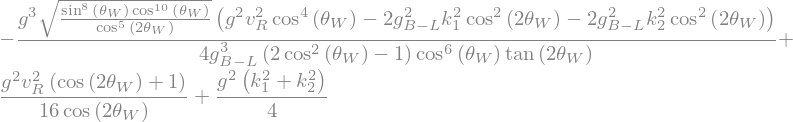

In [480]:
mZ1

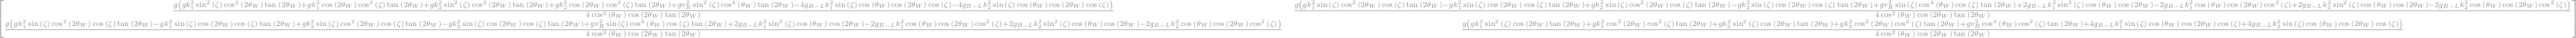

In [481]:
zeta = symbols(r'\zeta')
Ozeta = Matrix(
    [
        [cos(zeta), -sin(zeta)],
        [sin(zeta), cos(zeta)]
    ]
)

m0_rotate = (Ozeta.T*m0_square_vL0_rotation1*Ozeta).applyfunc(factor)
m0_rotate

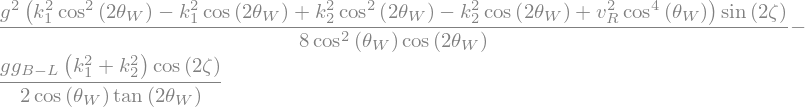

In [482]:
m0_rotate[0,1].collect([sin(zeta), cos(zeta)], factor).subs(
    {
        sin(zeta)*cos(zeta):sin(2*zeta)/2,
        cos(zeta)**2:(1 + cos(2*zeta))/2,
        sin(zeta)**2:(1 - cos(2*zeta))/2
    }
).expand().collect([sin(2*zeta), cos(2*zeta)], lambda x:x.factor())

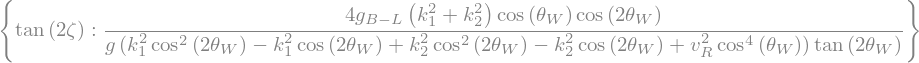

In [483]:
sin2zeta_sol = solve(m0_rotate[0,1].collect([sin(zeta), cos(zeta)], factor).subs(
    {
        sin(zeta)*cos(zeta):sin(2*zeta)/2,
        cos(zeta)**2:(1 + cos(2*zeta))/2,
        sin(zeta)**2:(1 - cos(2*zeta))/2
    }
).expand().collect([sin(2*zeta), cos(2*zeta)], lambda x:x.factor()), 
sin(2*zeta), dict=True)[0]
#sin2zeta_sol
tan2zeta_sol = {tan(2*zeta): (sin(2*zeta)/cos(2*zeta)).subs(sin2zeta_sol).factor()}
tan2zeta_sol


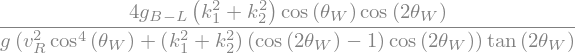

In [484]:
tan2zeta_sol[tan(2*zeta)].collect(vR,factor)

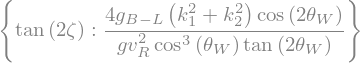

In [485]:
tan2zeta_sol_approx = {tan(2*zeta):tan2zeta_sol[tan(2*zeta)].collect(vR,factor).subs((k1**2 + k2**2), epsilon*vR).series(
    x=epsilon, x0=0, n=2
).removeO().subs(epsilon, (k1**2 + k2**2)/vR)}
tan2zeta_sol_approx

## Mixing among neutral gauge bosons

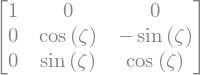

In [486]:
Ozeta3d = Matrix(
    [
        [1, 0, 0],
        [0, Ozeta[0,0], Ozeta[0,1]],
        [0, Ozeta[1,0], Ozeta[1,1]]
    ]
)
Ozeta3d

In [487]:
P0 = Ozeta3d*P0_approx2_angles

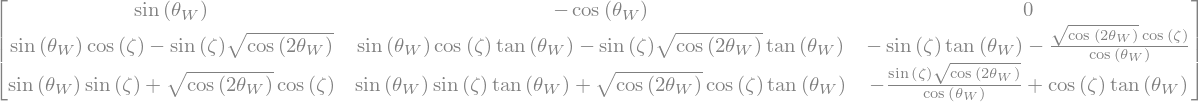

In [488]:
P0

In [489]:
P0_inv = P0_approx2_angles_inv*Ozeta3d.inv()

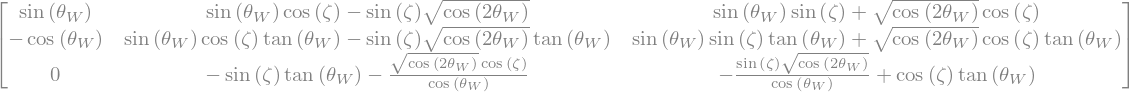

In [490]:
P0_inv.applyfunc(lambda x:x.trigsimp())

In [491]:
#thw, phi = symbols(r'\theta_W, phi')
#cw, sw = cos(thw), sin(thw)
#sM = tan(thw)
#cM = sqrt(cos(2*thw))/cos(thw)
#cphi, sphi = cos(phi), sin(phi)
#R0 = Matrix(
#    [
#        [cw*cphi, cw*sphi, sw],
#        [-sw*sM*cphi - cM*sphi, -sw*sM*sphi + cM*cphi, cw*sM],
#        [-sw*cM*cphi + sM*sphi, -sw*cM*sphi - sM*cphi, cw*cM]
#    ]
#)
#R0

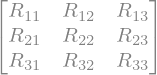

In [492]:
R11, R12, R13 = symbols('R_{11}, R_{12}, R_{13}', real=True)
R21, R22, R23 = symbols('R_{21}, R_{22}, R_{23}', real=True)
R31, R32, R33 = symbols('R_{31}, R_{32}, R_{33}', real=True)

R = Matrix(
    [
        [R11, R12, R13],
        [R21, R22, R23],
        [R31, R32, R33]
    ]
)
R

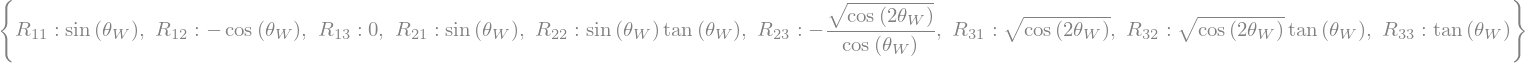

In [493]:
changes_R_neutral_bosons = {r:o for r, o in zip(list(R), list(P0_approx2_angles))}
changes_R_neutral_bosons

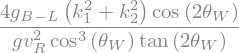

In [494]:
tan2zeta_sol_approx[tan(2*zeta)].subs(invert_dict(changes_R_neutral_bosons))

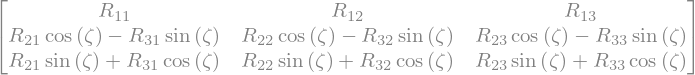

In [495]:
P0R = Ozeta3d*R
P0R

In [496]:
Z1, Z2, A = symbols('Z1, Z2, A', real=True)

mixingZ12A = P0*Matrix([
    [A],
    [Z1],
    [Z2]
])
mixingZ12A_R = P0R*Matrix([
    [A],
    [Z1],
    [Z2]
])

In [497]:
W3L_mix = mixingZ12A[0]
W3R_mix = mixingZ12A[1]
B_mix = mixingZ12A[2]

W3L_mix_R = mixingZ12A_R[0]
W3R_mix_R = mixingZ12A_R[1]
B_mix_R = mixingZ12A_R[2]

W3L_mix_R, W3R_mix_R, B_mix_R

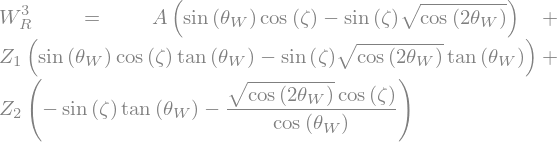

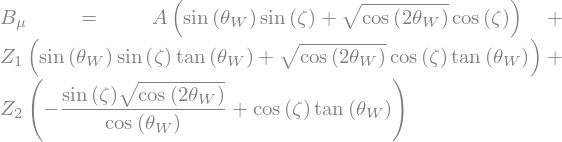

In [498]:
change_neutral_bosons = {W3L:W3L_mix, W3R:W3R_mix, Bmu:B_mix}
change_neutral_bosons_R = {W3L:W3L_mix_R, W3R:W3R_mix_R, Bmu:B_mix_R}
for field, mixing in change_neutral_bosons.items():
    display(Eq(field, mixing))

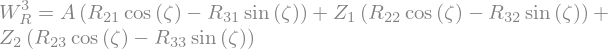

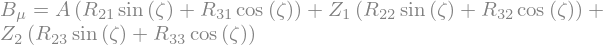

In [499]:
for field, mixing in change_neutral_bosons_R.items():
    display(Eq(field, mixing))

## Physical basis LHiggs

In [500]:
change_charged_bosons

In [501]:
change_neutral_bosons_R

In [502]:
LHiggs.free_symbols

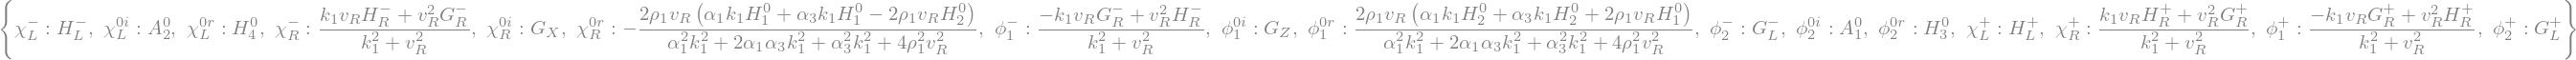

In [503]:
change_scalar_fields

In [524]:
LHiggs_physical = LHiggs.subs(change_charged_bosons).subs(change_neutral_bosons).expand()

In [525]:
LHiggs_physical.free_symbols

In [526]:
scalar_fields = list(vev_physical_charged_scalars.keys())
gauge_fields = [W1p, W2p, W1m, W2m, A, Z1, Z2]
fields = set(scalar_fields + gauge_fields)

In [527]:
scalar_fields

In [528]:
gauge_fields

In [529]:
fields

In [510]:
parameters = (LHiggs_physical.free_symbols).difference(fields)
parameters

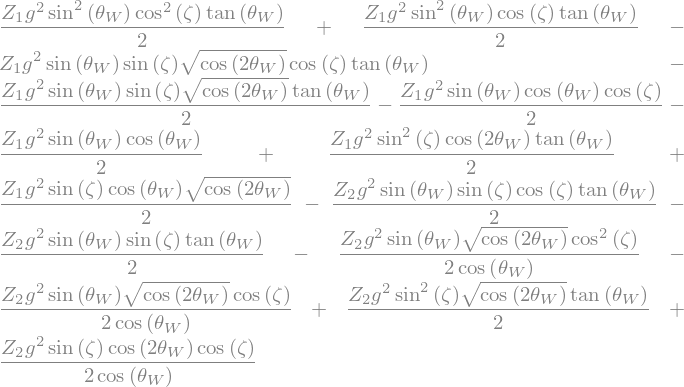

In [530]:
# terms porportional to the photon A in LHiggs_physical
terms_A = LHiggs_physical.expand().coeff(A).coeff(GLp).coeff(GLm)
terms_A

In [511]:
from sympy import Mul

In [512]:
def find_feynman_coefficients(Lag, fields, parameters):
    expanded_L = Lag.expand()
    terms = expanded_L.as_ordered_terms()

    # Store interactions uniquely in a dictionary { field_set : coefficient }
    interactions = {1: {}, 2: {}, 3: {}, 4: {}}  # Using dict to sum repeated interactions

    for t in terms:
        # Extract fields from the term
        term_fields = {s for s in t.free_symbols if s in fields}
        
        # Count the number of fields in the term
        num_fields = len(term_fields)
        
        # Extract coefficient (remove fields from the term)
        if num_fields > 0:
            coefficient = t / Mul(*term_fields)  # Factor out fields
            if coefficient.free_symbols.issubset(parameters):  # Ensure only parameters in coefficient
                # Store as a tuple (sorted fields, coefficient)
                sorted_fields = tuple(sorted(term_fields, key=lambda x: str(x)))  # Sorting ensures uniqueness
                
                # If interaction already exists, sum the coefficient
                if sorted_fields in interactions[num_fields]:
                    interactions[num_fields][sorted_fields] += coefficient
                else:
                    interactions[num_fields][sorted_fields] = coefficient
    return interactions

In [513]:
interactions_gauge_scalars = find_feynman_coefficients(
    Lag=LHiggs_physical,
    fields=fields,
    parameters=parameters
)

In [514]:
for interaction, coeff in interactions_gauge_scalars[3].items():
    print(interaction)

(A, Z1, {{H_2^0}})
(A, Z1, {{H_1^0}})
(A, Z1, {{H_3^0}})
(A, Z1, {{H_4^0}})
(A, Z2, {{H_2^0}})
(A, Z2, {{H_1^0}})
(A, Z2, {{H_3^0}})
(A, Z2, {{H_4^0}})
(A, W_1^+, {{G_R^-}})
(A, W_1^+, {{H_R^-}})
(A, W_1^+, {{G_L^-}})
(A, W_1^-, {{G_R^+}})
(A, W_1^-, {{H_R^+}})
(A, W_1^-, {{G_L^+}})
(A, W_2^+, {{G_R^-}})
(A, W_2^+, {{H_R^-}})
(A, W_2^+, {{G_L^-}})
(A, W_2^-, {{G_R^+}})
(A, W_2^-, {{H_R^+}})
(A, W_2^-, {{G_L^+}})
(A, W_1^+, {{H_L^-}})
(A, W_1^-, {{H_L^+}})
(A, W_2^+, {{H_L^-}})
(A, W_2^-, {{H_L^+}})
(Z1, Z2, {{H_2^0}})
(Z1, Z2, {{H_1^0}})
(Z1, Z2, {{H_3^0}})
(Z1, Z2, {{H_4^0}})
(W_1^+, Z1, {{G_R^-}})
(W_1^+, Z1, {{H_R^-}})
(W_1^+, Z1, {{G_L^-}})
(W_1^-, Z1, {{G_R^+}})
(W_1^-, Z1, {{H_R^+}})
(W_1^-, Z1, {{G_L^+}})
(W_2^+, Z1, {{G_R^-}})
(W_2^+, Z1, {{H_R^-}})
(W_2^+, Z1, {{G_L^-}})
(W_2^-, Z1, {{G_R^+}})
(W_2^-, Z1, {{H_R^+}})
(W_2^-, Z1, {{G_L^+}})
(W_1^+, Z2, {{G_R^-}})
(W_1^+, Z2, {{H_R^-}})
(W_1^+, Z2, {{G_L^-}})
(W_1^-, Z2, {{G_R^+}})
(W_1^-, Z2, {{H_R^+}})
(W_1^-, Z2, {{G_L^+}})
(W

## Interaction of photon with VS

In [516]:
for interaction, coeff in interactions_gauge_scalars[3].items():
    if A in interaction:
        print(interaction)

(A, Z1, {{H_2^0}})
(A, Z1, {{H_1^0}})
(A, Z1, {{H_3^0}})
(A, Z1, {{H_4^0}})
(A, Z2, {{H_2^0}})
(A, Z2, {{H_1^0}})
(A, Z2, {{H_3^0}})
(A, Z2, {{H_4^0}})
(A, W_1^+, {{G_R^-}})
(A, W_1^+, {{H_R^-}})
(A, W_1^+, {{G_L^-}})
(A, W_1^-, {{G_R^+}})
(A, W_1^-, {{H_R^+}})
(A, W_1^-, {{G_L^+}})
(A, W_2^+, {{G_R^-}})
(A, W_2^+, {{H_R^-}})
(A, W_2^+, {{G_L^-}})
(A, W_2^-, {{G_R^+}})
(A, W_2^-, {{H_R^+}})
(A, W_2^-, {{G_L^+}})
(A, W_1^+, {{H_L^-}})
(A, W_1^-, {{H_L^+}})
(A, W_2^+, {{H_L^-}})
(A, W_2^-, {{H_L^+}})


In [ ]:
interactions_gauge_scalars[3][(A, HLm, HLp)]

KeyError: (A, {{H_L^-}}, {{H_L^+}})

### Interaction H10 WW

In [256]:
for interaction, coeff in interactions_gauge_scalars[3].items():
    if H10 in interaction:
        print(interaction)

(A, Z1, {{H_1^0}})
(A, Z2, {{H_1^0}})
(Z1, Z2, {{H_1^0}})
(W_1^+, W_1^-, {{H_1^0}})
(W_1^+, W_2^-, {{H_1^0}})
(W_1^-, W_2^+, {{H_1^0}})
(W_2^+, W_2^-, {{H_1^0}})


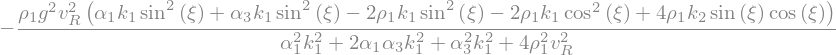

In [257]:
interactions_gauge_scalars[3][(W1p, W1m, H10)].factor()

In [258]:
interactionsH10_WW = [(W1p, W1m, H10), (W1p, W2m, H10), (W1m, W2p, H10), (W2p, W2m, H10)]

Interaction: 


Coefficient: 


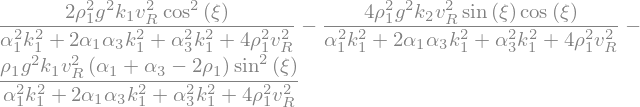

Coefficient approximation: 


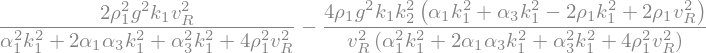

Interaction: 


Coefficient: 


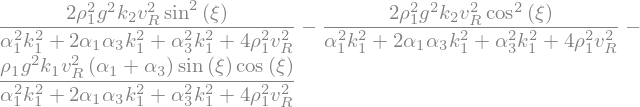

Coefficient approximation: 


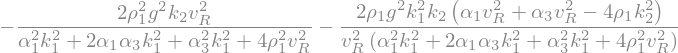

Interaction: 


Coefficient: 


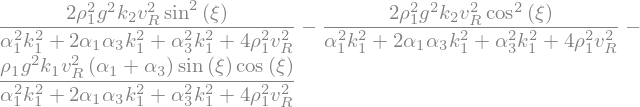

Coefficient approximation: 


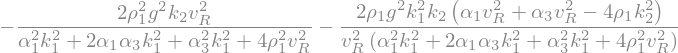

Interaction: 


Coefficient: 


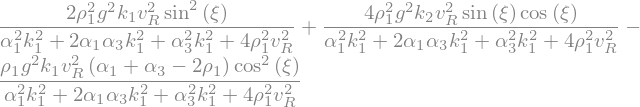

Coefficient approximation: 


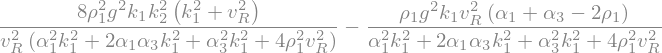

In [259]:
for interaction_tuple in interactionsH10_WW:
    coeff = interactions_gauge_scalars[3][interaction_tuple].factor()
    print('Interaction: ')
    display(Mul(*interaction_tuple))
    print('Coefficient: ')
    display(coeff.expand().collect([sin(xi), cos(xi)], factor))
    #display(coeff.trigsimp().factor())
    print('Coefficient approximation: ')
    display(coeff.subs(cos(xi),1).subs(sin(xi), tan2xi_sol[tan(2*xi)]/2).expand().collect(vR, factor))

In [260]:
from sympy import fraction

def full_factor_vR(expr):
    """
    Factorizes both the numerator and denominator of a given expression.
    
    Parameters:
    expr (sympy expression): The input expression to be factorized.
    
    Returns:
    sympy expression: The fully factorized expression.
    """
    # Separate numerator and denominator
    numerator, denominator = fraction(expr)
    numerator = numerator.collect(vR, lambda x:x.factor(deep=True))
    denominator = denominator.collect(vR, lambda x:x.factor(deep=True))
    
    # Factorize both
    factored_expr = numerator / denominator
    
    return factored_expr

Interaction: 


Coefficient: 


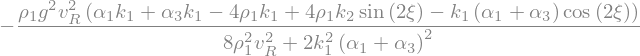

Coefficient approximation: 


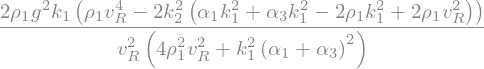

Interaction: 


Coefficient: 


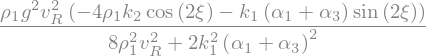

Coefficient approximation: 


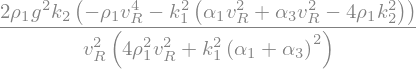

Interaction: 


Coefficient: 


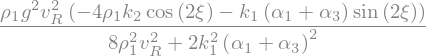

Coefficient approximation: 


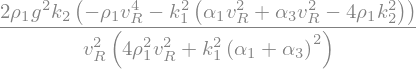

Interaction: 


Coefficient: 


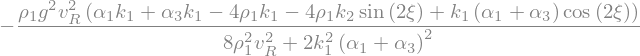

Coefficient approximation: 


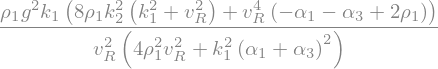

In [261]:
for interaction_tuple in interactionsH10_WW:
    coeff = interactions_gauge_scalars[3][interaction_tuple].factor()
    print('Interaction: ')
    display(Mul(*interaction_tuple))
    print('Coefficient: ')
    display(full_factor_vR(
        coeff.expand().collect([sin(xi), cos(xi)], factor).subs(
        sin(xi)**2,(1 - cos(2*xi)) / 2
        ).subs(
        cos(xi)**2,(1 + cos(2*xi)) / 2
        ).collect(cos(2*xi), lambda x:x.trigsimp()).collect([cos(2*xi), sin(2*xi)]).simplify()
    )
    )
    #display(coeff.trigsimp().factor())
    print('Coefficient approximation: ')
    display(
        full_factor_vR(
            coeff.subs(cos(xi),1).subs(sin(xi), tan2xi_sol[tan(2*xi)]/2).expand().collect(vR, factor).simplify()
        )
    )

In [262]:
from symbolic_tools import generate_latex_table_dict

In [263]:
def simplification_coeff(coeff):
    coeff_simplified = full_factor_vR(
        coeff.expand().collect([sin(xi), cos(xi)], factor).subs(
        sin(xi)**2,(1 - cos(2*xi)) / 2
        ).subs(
        cos(xi)**2,(1 + cos(2*xi)) / 2
        ).collect(cos(2*xi), lambda x:x.trigsimp()).collect([cos(2*xi), sin(2*xi)]).simplify()
    )
    numerator, denominator = fraction(coeff_simplified) 
    #return (1/denominator), numerator
    return Mul((1/denominator), numerator, evaluate=True)
    

def simplification_approx(coeff):
    coeff_simplified = full_factor_vR(
            coeff.subs(cos(xi),1).subs(sin(xi), tan2xi_sol[tan(2*xi)]/2).expand().collect(vR, factor).simplify()
        )
    numerator, denominator = fraction(coeff_simplified) 
    return Mul((1/denominator), numerator, evaluate=False)

In [264]:
interactionsH10_WW_dict = {interaction:interactions_gauge_scalars[3][interaction] for interaction in interactionsH10_WW}

In [266]:
print(generate_latex_table_dict(
    interactionsH10_WW_dict, 
    simplification_coeff=simplification_coeff,
    simplification_approx=simplification_approx
))

\begin{array}{|c|c|c|}
\hline
\textbf{Interaction} & \textbf{Coefficient} & \textbf{Simplified} \\
\hline
$W^{+}_{1} W^{-}_{1} {{H_1^0}}$ & $- \frac{\rho_{1} g^{2} v_{R}^{2} \left(\alpha_{1} k_{1} + \alpha_{3} k_{1} - 4 \rho_{1} k_{1} + 4 \rho_{1} k_{2} \sin{\left(2 \xi \right)} - k_{1} \left(\alpha_{1} + \alpha_{3}\right) \cos{\left(2 \xi \right)}\right)}{8 \rho_{1}^{2} v_{R}^{2} + 2 k_{1}^{2} \left(\alpha_{1} + \alpha_{3}\right)^{2}}$ & $\frac{1}{v_{R}^{2} \left(4 \rho_{1}^{2} v_{R}^{2} + k_{1}^{2} \left(\alpha_{1} + \alpha_{3}\right)^{2}\right)} 2 \rho_{1} g^{2} k_{1} \left(\rho_{1} v_{R}^{4} - 2 k_{2}^{2} \left(\alpha_{1} k_{1}^{2} + \alpha_{3} k_{1}^{2} - 2 \rho_{1} k_{1}^{2} + 2 \rho_{1} v_{R}^{2}\right)\right)$ \\ 
\hline
$W^{+}_{1} W^{-}_{2} {{H_1^0}}$ & $\frac{\rho_{1} g^{2} v_{R}^{2} \left(- 4 \rho_{1} k_{2} \cos{\left(2 \xi \right)} - k_{1} \left(\alpha_{1} + \alpha_{3}\right) \sin{\left(2 \xi \right)}\right)}{8 \rho_{1}^{2} v_{R}^{2} + 2 k_{1}^{2} \left(\alpha_{1} + \alpha_

### Interaction Z SS

In [267]:
for interaction, coeff in interactions_gauge_scalars[3].items():
    if Z1 in interaction:
        print(interaction)

(A, Z1, {{H_2^0}})
(A, Z1, {{H_1^0}})
(A, Z1, {{H_3^0}})
(A, Z1, {{H_4^0}})
(Z1, Z2, {{H_2^0}})
(Z1, Z2, {{H_1^0}})
(Z1, Z2, {{H_3^0}})
(Z1, Z2, {{H_4^0}})
(W_1^+, Z1, {{G_R^-}})
(W_1^+, Z1, {{H_R^-}})
(W_1^+, Z1, {{G_L^-}})
(W_1^-, Z1, {{G_R^+}})
(W_1^-, Z1, {{H_R^+}})
(W_1^-, Z1, {{G_L^+}})
(W_2^+, Z1, {{G_R^-}})
(W_2^+, Z1, {{H_R^-}})
(W_2^+, Z1, {{G_L^-}})
(W_2^-, Z1, {{G_R^+}})
(W_2^-, Z1, {{H_R^+}})
(W_2^-, Z1, {{G_L^+}})
(W_1^+, Z1, {{H_L^-}})
(W_1^-, Z1, {{H_L^+}})
(W_2^+, Z1, {{H_L^-}})
(W_2^-, Z1, {{H_L^+}})


In [268]:
interactionsZ1_VS = []
for Xp in [GRp, GLp, HLp, HRp, W1p, W2p]:
    for Xm in [GRm, GLm, HLm, HRm, W1m, W2m]:
        fields_tuple = tuple(sorted({Z1, Xp, Xm}, key=lambda x: str(x)))
        if fields_tuple not in interactionsZ1_VS:
            print(fields_tuple)
            interactionsZ1_VS.append(fields_tuple)

(Z1, {{G_R^+}}, {{G_R^-}})
(Z1, {{G_L^-}}, {{G_R^+}})
(Z1, {{G_R^+}}, {{H_L^-}})
(Z1, {{G_R^+}}, {{H_R^-}})
(W_1^-, Z1, {{G_R^+}})
(W_2^-, Z1, {{G_R^+}})
(Z1, {{G_L^+}}, {{G_R^-}})
(Z1, {{G_L^+}}, {{G_L^-}})
(Z1, {{G_L^+}}, {{H_L^-}})
(Z1, {{G_L^+}}, {{H_R^-}})
(W_1^-, Z1, {{G_L^+}})
(W_2^-, Z1, {{G_L^+}})
(Z1, {{G_R^-}}, {{H_L^+}})
(Z1, {{G_L^-}}, {{H_L^+}})
(Z1, {{H_L^+}}, {{H_L^-}})
(Z1, {{H_L^+}}, {{H_R^-}})
(W_1^-, Z1, {{H_L^+}})
(W_2^-, Z1, {{H_L^+}})
(Z1, {{G_R^-}}, {{H_R^+}})
(Z1, {{G_L^-}}, {{H_R^+}})
(Z1, {{H_L^-}}, {{H_R^+}})
(Z1, {{H_R^+}}, {{H_R^-}})
(W_1^-, Z1, {{H_R^+}})
(W_2^-, Z1, {{H_R^+}})
(W_1^+, Z1, {{G_R^-}})
(W_1^+, Z1, {{G_L^-}})
(W_1^+, Z1, {{H_L^-}})
(W_1^+, Z1, {{H_R^-}})
(W_1^+, W_1^-, Z1)
(W_1^+, W_2^-, Z1)
(W_2^+, Z1, {{G_R^-}})
(W_2^+, Z1, {{G_L^-}})
(W_2^+, Z1, {{H_L^-}})
(W_2^+, Z1, {{H_R^-}})
(W_1^-, W_2^+, Z1)
(W_2^+, W_2^-, Z1)


In [269]:
interactionsZ1_VS_dict = {}
for interaction in interactionsZ1_VS:
    try:
        interactionsZ1_VS_dict[interaction] = interactions_gauge_scalars[3][interaction]
    except:
        print(f'Interaction {interaction} does not appear in this lagrangian')

Interaction (Z1, {{G_R^+}}, {{G_R^-}}) does not appear in this lagrangian
Interaction (Z1, {{G_L^-}}, {{G_R^+}}) does not appear in this lagrangian
Interaction (Z1, {{G_R^+}}, {{H_L^-}}) does not appear in this lagrangian
Interaction (Z1, {{G_R^+}}, {{H_R^-}}) does not appear in this lagrangian
Interaction (Z1, {{G_L^+}}, {{G_R^-}}) does not appear in this lagrangian
Interaction (Z1, {{G_L^+}}, {{G_L^-}}) does not appear in this lagrangian
Interaction (Z1, {{G_L^+}}, {{H_L^-}}) does not appear in this lagrangian
Interaction (Z1, {{G_L^+}}, {{H_R^-}}) does not appear in this lagrangian
Interaction (Z1, {{G_R^-}}, {{H_L^+}}) does not appear in this lagrangian
Interaction (Z1, {{G_L^-}}, {{H_L^+}}) does not appear in this lagrangian
Interaction (Z1, {{H_L^+}}, {{H_L^-}}) does not appear in this lagrangian
Interaction (Z1, {{H_L^+}}, {{H_R^-}}) does not appear in this lagrangian
Interaction (Z1, {{G_R^-}}, {{H_R^+}}) does not appear in this lagrangian
Interaction (Z1, {{G_L^-}}, {{H_R^+}})

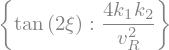

In [270]:
tan2xi_sol

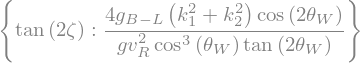

In [271]:
tan2zeta_sol_approx

Interaction: 


Coeff: 


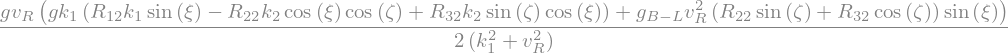

Interaction: 


Coeff: 


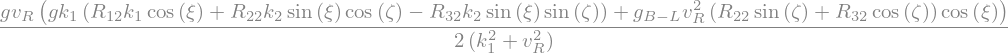

Interaction: 


Coeff: 


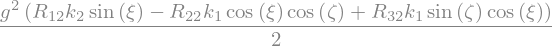

Interaction: 


Coeff: 


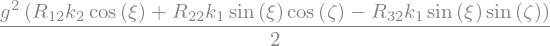

Interaction: 


Coeff: 


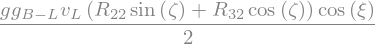

Interaction: 


Coeff: 


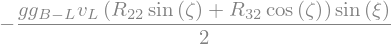

Interaction: 


Coeff: 


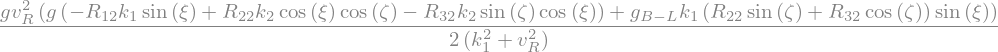

Interaction: 


Coeff: 


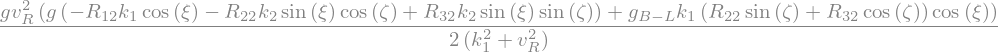

Interaction: 


Coeff: 


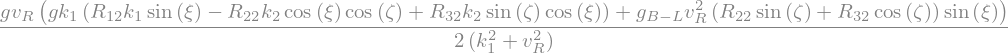

Interaction: 


Coeff: 


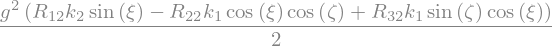

Interaction: 


Coeff: 


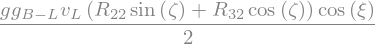

Interaction: 


Coeff: 


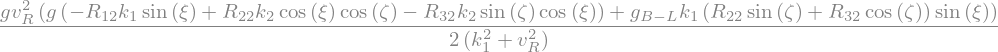

Interaction: 


Coeff: 


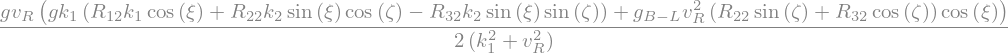

Interaction: 


Coeff: 


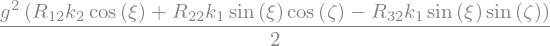

Interaction: 


Coeff: 


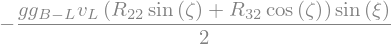

Interaction: 


Coeff: 


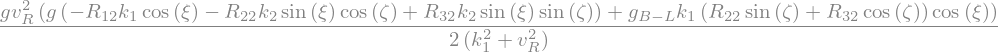

In [279]:
for interaction_tuple, coeff in interactionsZ1_VS_dict.items():
    print('Interaction: ')
    display(interaction_tuple)
    print('Coeff: ')
    coeff = coeff.subs(R13, 0).expand().simplify()
    display(coeff)
    #print('Approximation coeff: ')
    #coeff_approx = coeff.subs(sin(xi),tan2xi_sol[tan(2*xi)]/2).subs(cos(xi), 1).subs(
    #    sin(zeta),tan2zeta_sol_approx[tan(2*zeta)]/2
    #).subs(cos(zeta), 1).factor()
    #display(coeff_approx)

In [281]:
from symbolic_tools import generate_latex_table_dict_2col

In [283]:
print(generate_latex_table_dict_2col(
    interactionsZ1_VS_dict, 
    simplification_coeff=lambda x:x.factor()
))

\begin{array}{|c|c|}
\hline
\textbf{Interaction} & \textbf{Coefficient} \\
\hline
$W^{-}_{1} Z_{1} {{G_R^+}}$ & $\frac{g v_{R} \left(R_{12} g k_{1}^{2} \sin{\left(\xi \right)} - R_{22} g k_{1} k_{2} \cos{\left(\xi \right)} \cos{\left(\zeta \right)} + R_{22} g_{B-L} v_{R}^{2} \sin{\left(\xi \right)} \sin{\left(\zeta \right)} + R_{32} g k_{1} k_{2} \sin{\left(\zeta \right)} \cos{\left(\xi \right)} + R_{32} g_{B-L} v_{R}^{2} \sin{\left(\xi \right)} \cos{\left(\zeta \right)}\right)}{2 \left(k_{1}^{2} + v_{R}^{2}\right)}$ \\ 
\hline
$W^{-}_{2} Z_{1} {{G_R^+}}$ & $\frac{g v_{R} \left(R_{12} g k_{1}^{2} \cos{\left(\xi \right)} + R_{22} g k_{1} k_{2} \sin{\left(\xi \right)} \cos{\left(\zeta \right)} + R_{22} g_{B-L} v_{R}^{2} \sin{\left(\zeta \right)} \cos{\left(\xi \right)} - R_{32} g k_{1} k_{2} \sin{\left(\xi \right)} \sin{\left(\zeta \right)} + R_{32} g_{B-L} v_{R}^{2} \cos{\left(\xi \right)} \cos{\left(\zeta \right)}\right)}{2 \left(k_{1}^{2} + v_{R}^{2}\right)}$ \\ 
\hline
$W^{-}_{1} Z_{

### Interaction H10 SS

In [544]:
V_physical = VLRPhi_ri_tadpole_caso1.subs(complex_scalar_fields).subs(change_scalar_fields).subs(conjugate_fields)
V_physical.free_symbols

In [545]:
fields

In [546]:
parameters_potential = (V_physical.free_symbols).difference(fields)
parameters_potential

In [547]:
interactions_scalars = find_feynman_coefficients(
    Lag=V_physical,
    fields=fields,
    parameters=parameters_potential
)

In [548]:
for interaction, coeff in interactions_scalars[3].items():
    if H10 in interaction:
        print(interaction)

({{H_1^0}}, {{H_2^0}}, {{H_3^0}})
({{H_1^0}}, {{H_2^0}}, {{H_4^0}})
({{G_R^+}}, {{G_R^-}}, {{H_1^0}})
({{G_R^+}}, {{H_1^0}}, {{H_R^-}})
({{G_R^-}}, {{H_1^0}}, {{H_R^+}})
({{H_1^0}}, {{H_R^+}}, {{H_R^-}})
({{G_L^+}}, {{G_L^-}}, {{H_1^0}})
({{G_L^+}}, {{H_1^0}}, {{H_R^-}})
({{G_L^-}}, {{H_1^0}}, {{H_R^+}})
({{G_L^+}}, {{G_R^-}}, {{H_1^0}})
({{G_L^-}}, {{G_R^+}}, {{H_1^0}})
({{H_1^0}}, {{H_L^+}}, {{H_L^-}})
({{G_L^+}}, {{H_1^0}}, {{H_L^-}})
({{G_L^-}}, {{H_1^0}}, {{H_L^+}})
({{A_1^0}}, {{G_Z}}, {{H_1^0}})


In [549]:
# interactionsH10_SS = [tuple(sorted({H10, Xp, Xm}, key=lambda x: str(x))) for Xp in [GRp, GLp, HLp, HRp] for Xm in [GRm, GLm, HLm, HRm]]
# print(interactionsH10_SS)

In [550]:
interactionsH10_SS = []
for Xp in [GRp, GLp, HLp, HRp]:
    for Xm in [GRm, GLm, HLm, HRm]:
        fields = tuple(sorted({H10, Xp, Xm}, key=lambda x: str(x)))
        if fields not in interactionsH10_SS:
            print(fields)
            interactionsH10_SS.append(fields)

({{G_R^+}}, {{G_R^-}}, {{H_1^0}})
({{G_L^-}}, {{G_R^+}}, {{H_1^0}})
({{G_R^+}}, {{H_1^0}}, {{H_L^-}})
({{G_R^+}}, {{H_1^0}}, {{H_R^-}})
({{G_L^+}}, {{G_R^-}}, {{H_1^0}})
({{G_L^+}}, {{G_L^-}}, {{H_1^0}})
({{G_L^+}}, {{H_1^0}}, {{H_L^-}})
({{G_L^+}}, {{H_1^0}}, {{H_R^-}})
({{G_R^-}}, {{H_1^0}}, {{H_L^+}})
({{G_L^-}}, {{H_1^0}}, {{H_L^+}})
({{H_1^0}}, {{H_L^+}}, {{H_L^-}})
({{H_1^0}}, {{H_L^+}}, {{H_R^-}})
({{G_R^-}}, {{H_1^0}}, {{H_R^+}})
({{G_L^-}}, {{H_1^0}}, {{H_R^+}})
({{H_1^0}}, {{H_L^-}}, {{H_R^+}})
({{H_1^0}}, {{H_R^+}}, {{H_R^-}})


In [551]:
interactionsH10_SS_dict = {}
for interaction in interactionsH10_SS:
    try:
        interactionsH10_SS_dict[interaction] = interactions_scalars[3][interaction]
    except:
        print(f'Interaction {interaction} does not appear in this lagrangian')


Interaction ({{G_R^+}}, {{H_1^0}}, {{H_L^-}}) does not appear in this lagrangian
Interaction ({{G_R^-}}, {{H_1^0}}, {{H_L^+}}) does not appear in this lagrangian
Interaction ({{H_1^0}}, {{H_L^+}}, {{H_R^-}}) does not appear in this lagrangian
Interaction ({{H_1^0}}, {{H_L^-}}, {{H_R^+}}) does not appear in this lagrangian


In [552]:
def factor_fraction_vR(expr):
    """
    Factorizes both the numerator and denominator of a given expression.
    
    Parameters:
    expr (sympy expression): The input expression to be factorized.
    
    Returns:
    sympy expression: The fully factorized expression.
    """
    # Separate numerator and denominator
    numerator, denominator = fraction(expr)
    numerator = numerator.collect(vR, lambda x:x.collect([rho1], lambda x:x.factor(deep=True)))
    denominator = denominator.collect(vR, lambda x:x.factor(deep=True))
    
    # Factorize both
    factored_expr = numerator / denominator
    
    return factored_expr

Interaction: 


Coefficient: 


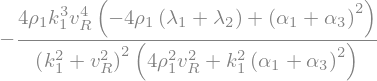

Interaction: 


Coefficient: 


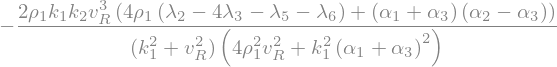

Interaction: 


Coefficient: 


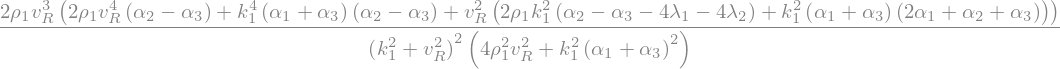

Interaction: 


Coefficient: 


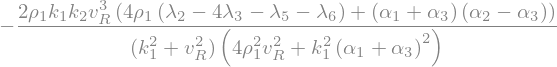

Interaction: 


Coefficient: 


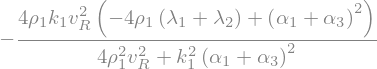

Interaction: 


Coefficient: 


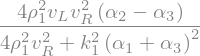

Interaction: 


Coefficient: 


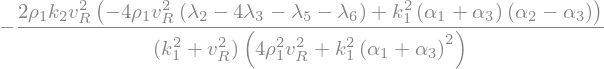

Interaction: 


Coefficient: 


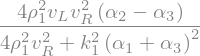

Interaction: 


Coefficient: 


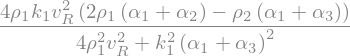

Interaction: 


Coefficient: 


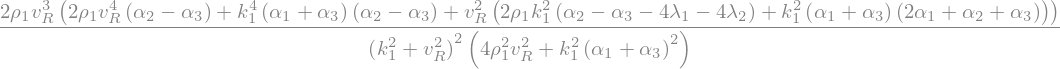

Interaction: 


Coefficient: 


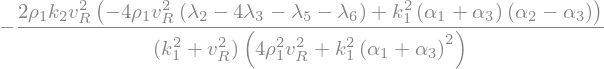

Interaction: 


Coefficient: 


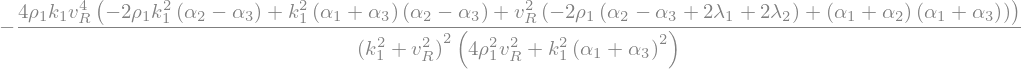

In [553]:
for interaction_tuple, coeff in interactionsH10_SS_dict.items():
    print('Interaction: ')
    display(Mul(*interaction_tuple))
    print('Coefficient: ')
    coeff_simplified = factor_fraction_vR(
            coeff.factor()
        )#.expand().collect(vR, lambda x:x.collect(rho1, factor))
    interactionsH10_SS_dict[interaction_tuple] = coeff_simplified
    display(coeff_simplified)
    #display(coeff.trigsimp().factor())
    #print('Coefficient approximation: ')
    #display(
    #    full_factor_vR(
    #        coeff.subs(cos(xi),1).subs(sin(xi), tan2xi_sol[tan(2*xi)]/2).expand().collect(vR, factor).simplify()
    #    )
    #)

In [554]:
print(
    generate_latex_table_dict(
    interactions=interactionsH10_SS_dict,
    simplification_approx=lambda x:1
    )
)

\begin{array}{|c|c|c|}
\hline
\textbf{Interaction} & \textbf{Coefficient} & \textbf{Simplified} \\
\hline
${{G_R^+}} {{G_R^-}} {{H_1^0}}$ & $- \frac{4 \rho_{1} k_{1}^{3} v_{R}^{4} \left(- 4 \rho_{1} \left(\lambda_{1} + \lambda_{2}\right) + \left(\alpha_{1} + \alpha_{3}\right)^{2}\right)}{\left(k_{1}^{2} + v_{R}^{2}\right)^{2} \left(4 \rho_{1}^{2} v_{R}^{2} + k_{1}^{2} \left(\alpha_{1} + \alpha_{3}\right)^{2}\right)}$ & $1$ \\ 
\hline
${{G_L^-}} {{G_R^+}} {{H_1^0}}$ & $- \frac{2 \rho_{1} k_{1} k_{2} v_{R}^{3} \left(4 \rho_{1} \left(\lambda_{2} - 4 \lambda_{3} - \lambda_{5} - \lambda_{6}\right) + \left(\alpha_{1} + \alpha_{3}\right) \left(\alpha_{2} - \alpha_{3}\right)\right)}{\left(k_{1}^{2} + v_{R}^{2}\right) \left(4 \rho_{1}^{2} v_{R}^{2} + k_{1}^{2} \left(\alpha_{1} + \alpha_{3}\right)^{2}\right)}$ & $1$ \\ 
\hline
${{G_R^+}} {{H_1^0}} {{H_R^-}}$ & $\frac{2 \rho_{1} v_{R}^{3} \left(2 \rho_{1} v_{R}^{4} \left(\alpha_{2} - \alpha_{3}\right) + k_{1}^{4} \left(\alpha_{1} + \alpha_{3}\rig

# Yukawa lepton sector

$$\mathcal{L}\supset-\overline{L}_{iR}Y_{ij}\Phi^{\dagger}L_{jL}-\overline{L}_{iR}\tilde{Y}_{ij}\tilde{\Phi}^{\dagger}L_{jL}-\overline{S}_{i}Y_{ijL}\tilde{\chi}_{L}L_{ijL}-\overline{S}_{i}^{c}Y_{ijR}\tilde{\chi}_{R}L_{jR}-\frac{1}{2}\overline{S}_{i}^{c}\mu_{ij}S_{j}+\text{h.c.}$$

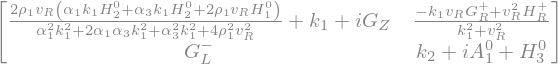

In [341]:
Phi = Phi.subs(conjugate_fields)
Phi

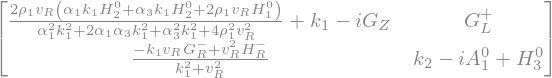

In [342]:
PhiDagger = PhiDagger.subs(complex_scalar_fields).subs(change_scalar_fields).subs(conjugate_fields)
PhiDagger